In [1]:
import sys
import os
from matplotlib import axis

sys.path.append(os.path.abspath('..'))

from utils.TestRunner import *

testResultSets = {}

forceTests = False

# Horizontal Air Acceleration Tests

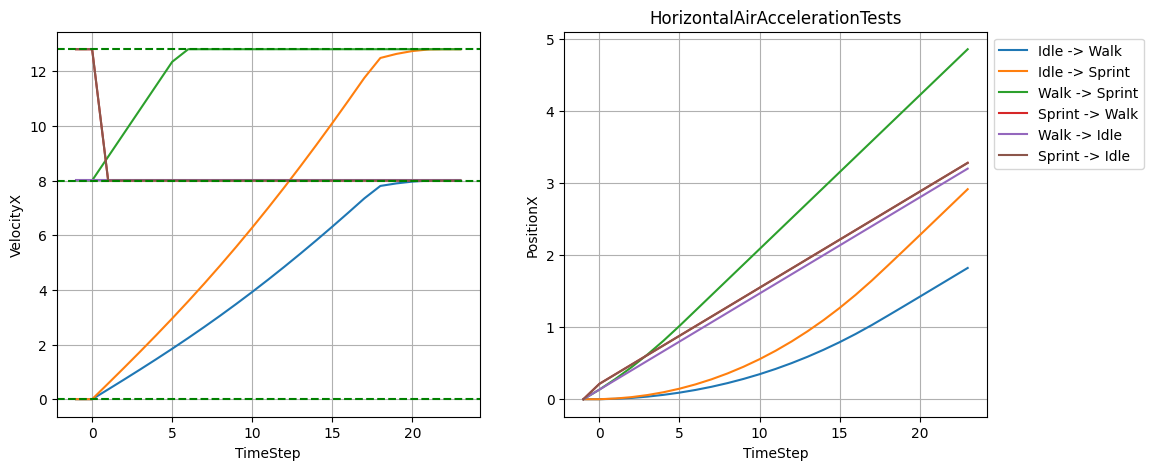

In [2]:
results = TestResults.load('HorizontalAirAccelerationTests')

if not results.hasData() or forceTests:
    
    results.Data = TestRunner.runTests([
        TestScenario(levelName='WallJumpTests', testSteps=[
            TestStep(actions=[], repeatCounts=[10]),
            TestStep(actions=['Jump'], repeatCounts=[30]),
            TestStep(actions=['Jump', 'Right'], repeatCounts=[25]),
            TestStep(actions=[], repeatCounts=[5])
        ]),
        TestScenario(levelName='WallJumpTests', testSteps=[
            TestStep(actions=[], repeatCounts=[10]),
            TestStep(actions=['Jump'], repeatCounts=[30]),
            TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[25]),
            TestStep(actions=[], repeatCounts=[5])
        ]),
        TestScenario(levelName='WallJumpTests', testSteps=[
            TestStep(actions=[], repeatCounts=[10]),
            TestStep(actions=['Jump', 'Right'], repeatCounts=[30]),
            TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[25]),
            TestStep(actions=[], repeatCounts=[5])
        ]),
        TestScenario(levelName='WallJumpTests', testSteps=[
            TestStep(actions=[], repeatCounts=[10]),
            TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[30]),
            TestStep(actions=['Jump', 'Right'], repeatCounts=[25]),
            TestStep(actions=[], repeatCounts=[5])
        ]),
        TestScenario(levelName='WallJumpTests', testSteps=[
            TestStep(actions=[], repeatCounts=[10]),
            TestStep(actions=['Jump', 'Right'], repeatCounts=[30]),
            TestStep(actions=['Jump'], repeatCounts=[25]),
            TestStep(actions=[], repeatCounts=[5])
        ]),
        TestScenario(levelName='WallJumpTests', testSteps=[
            TestStep(actions=[], repeatCounts=[10]),
            TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[30]),
            TestStep(actions=['Jump'], repeatCounts=[25]),
            TestStep(actions=[], repeatCounts=[5])
        ]),
    ])

    results.renameTestCase('[](010)_[Jump](030)_[Jump,Right](025)_[](005)', 'Idle -> Walk')
    results.renameTestCase('[](010)_[Jump](030)_[Jump,Right,Sprint](025)_[](005)', 'Idle -> Sprint')
    results.renameTestCase('[](010)_[Jump,Right](030)_[Jump,Right,Sprint](025)_[](005)', 'Walk -> Sprint')
    results.renameTestCase('[](010)_[Jump,Right,Sprint](030)_[Jump,Right](025)_[](005)', 'Sprint -> Walk')
    results.renameTestCase('[](010)_[Jump,Right](030)_[Jump](025)_[](005)', 'Walk -> Idle')
    results.renameTestCase('[](010)_[Jump,Right,Sprint](030)_[Jump](025)_[](005)', 'Sprint -> Idle')
    print(results.getTestCases())

    results.filter(lambda d: d[d['TimeStep'] >= 39])
    results.filter(lambda d: d[d['TimeStep'] < 25])
    results.Data['TimeStep'] -= 1

    results.save()
    

testResultSets[results.Name] = results.getTestCases()
results.plotTests([ 
    ('TimeStep', 'VelocityX'),
    ('TimeStep', 'PositionX'),
])

# Horizontal Air Turnaround Tests

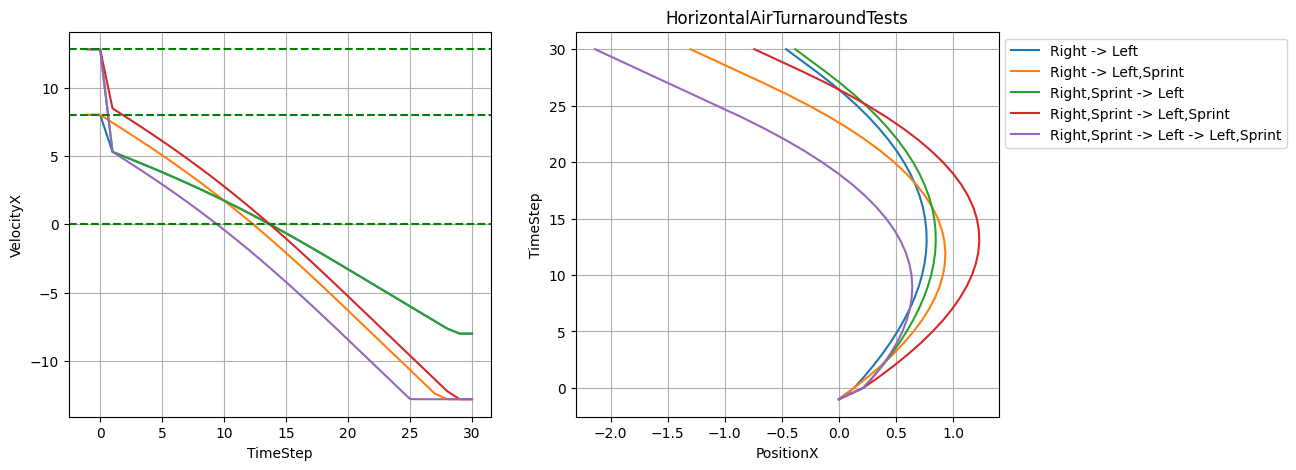

In [3]:
results = TestResults.load('HorizontalAirTurnaroundTests')

if not results.hasData() or forceTests:
    
    results.Data = TestRunner.runTests([
        TestScenario(levelName='WallJumpTests', testSteps=[
            TestStep(actions=[], repeatCounts=[10]),
            TestStep(actions=['Jump', 'Right'], repeatCounts=[30]),
            TestStep(actions=['Jump', 'Left'], repeatCounts=[36], positionOffset={ 'x' : 10, 'y' : 0 }),
            TestStep(actions=[], repeatCounts=[5])
        ]),
        TestScenario(levelName='WallJumpTests', testSteps=[
            TestStep(actions=[], repeatCounts=[10]),
            TestStep(actions=['Jump', 'Right'], repeatCounts=[30]),
            TestStep(actions=['Jump', 'Left', 'Sprint'], repeatCounts=[36], positionOffset={ 'x' : 10, 'y' : 0 }),
            TestStep(actions=[], repeatCounts=[5])
        ]),
        TestScenario(levelName='WallJumpTests', testSteps=[
            TestStep(actions=[], repeatCounts=[10]),
            TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[30]),
            TestStep(actions=['Jump', 'Left'], repeatCounts=[36], positionOffset={ 'x' : 10, 'y' : 0 }),
            TestStep(actions=[], repeatCounts=[5])
        ]),
        TestScenario(levelName='WallJumpTests', testSteps=[
            TestStep(actions=[], repeatCounts=[10]),
            TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[30]),
            TestStep(actions=['Jump', 'Left', 'Sprint'], repeatCounts=[36], positionOffset={ 'x' : 10, 'y' : 0 }),
            TestStep(actions=[], repeatCounts=[5])
        ]),
        TestScenario(levelName='WallJumpTests', testSteps=[
            TestStep(actions=[], repeatCounts=[10]),
            TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[30]),
            TestStep(actions=['Jump', 'Left'], repeatCounts=[1], positionOffset={ 'x' : 10, 'y' : 0 }),
            TestStep(actions=['Jump', 'Left', 'Sprint'], repeatCounts=[35]),
            TestStep(actions=[], repeatCounts=[5])
        ]),
    ])

    results.renameTestCase('[](010)_[Jump,Right](030)_[Jump,Left](036)_[](005)', 'Right -> Left')
    results.renameTestCase('[](010)_[Jump,Right](030)_[Jump,Left,Sprint](036)_[](005)', 'Right -> Left,Sprint')
    results.renameTestCase('[](010)_[Jump,Right,Sprint](030)_[Jump,Left](036)_[](005)', 'Right,Sprint -> Left')
    results.renameTestCase('[](010)_[Jump,Right,Sprint](030)_[Jump,Left,Sprint](036)_[](005)', 'Right,Sprint -> Left,Sprint')
    results.renameTestCase('[](010)_[Jump,Right,Sprint](030)_[Jump,Left](001)_[Jump,Left,Sprint](035)_[](005)', 'Right,Sprint -> Left -> Left,Sprint')
    print(results.getTestCases())

    results.filter(lambda d: d[d['TimeStep'] >= 39])
    results.filter(lambda d: d[d['TimeStep'] <= 31])
    results.Data['TimeStep'] -= 1
    
    results.save()


testResultSets[results.Name] = results.getTestCases()
results.plotTests([ 
    ('TimeStep', 'VelocityX'),
    ('PositionX', 'TimeStep'),
])

# Horizontal Air Stop Tests

25    0.02657
Name: VelocityX, dtype: float64

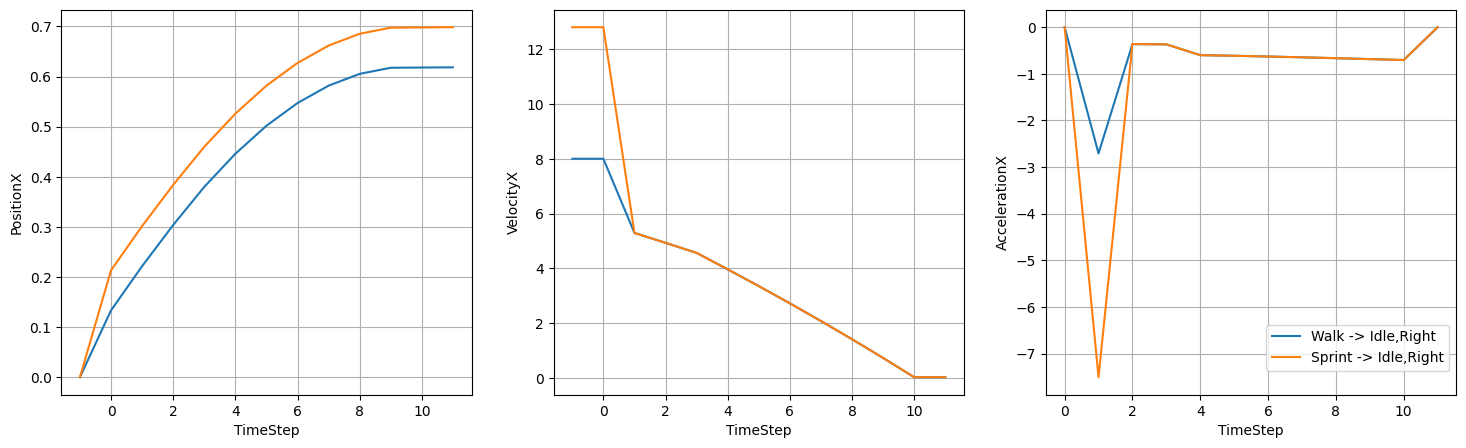

In [2]:
results = TestResults.load('HorizontalAirStopTests')

if not results.hasData() or forceTests:
    
    results.Data = TestRunner.runTests([
        TestScenario(levelName='WallJumpTests', testSteps=[
            TestStep(actions=[], repeatCounts=[10]),
            TestStep(actions=['Jump', 'Right'], repeatCounts=[30], positionOffset={ 'x' : 10, 'y' : 0 }),

            TestStep(actions=['Left'], repeatCounts=[0,1,2,3]),
            TestStep(actions=['Left', 'Sprint'], repeatCounts=[5,6,7,8,9]),
            TestStep(actions=['Left'], repeatCounts=[0,1,2,3]),
            TestStep(actions=[], repeatCounts=[60])
        ]),
        TestScenario(levelName='WallJumpTests', testSteps=[
            TestStep(actions=[], repeatCounts=[10]),
            TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[30], positionOffset={ 'x' : 10, 'y' : 0 }),

            TestStep(actions=['Left'], repeatCounts=[0,1,2,3]),
            TestStep(actions=['Left', 'Sprint'], repeatCounts=[5,6,7,8,9]),
            TestStep(actions=['Left'], repeatCounts=[0,1,2,3]),
            TestStep(actions=[], repeatCounts=[60])
        ]),
    ])

    results.filter(lambda d: d[d['TimeStep'] >= 39])
    results.filter(lambda d: d[d['TimeStep'] <= 12])

    tests = results.getTestCases()

    def get_abs_velocity_x(testName):
        return results.Data[(results.Data['TimeStep'] == 12) & (results.Data['ScenarioName'] == testName)]['VelocityX'].abs().values[0]

    sorted_tests = sorted(tests, key=get_abs_velocity_x)
    results.Data = results.Data[results.Data['ScenarioName'].isin(sorted_tests[:2])]
    results.Data['TimeStep'] -= 1

    results.renameTestCase('[](010)_[Jump,Right](030)_[Left](003)_[Left,Sprint](007)_[Left](000)_[](060)', 'Walk -> Idle')
    results.renameTestCase('[](010)_[Jump,Right,Sprint](030)_[Left](003)_[Left,Sprint](007)_[Left](000)_[](060)', 'Sprint -> Idle')
    print(results.getTestCases())

    results.save()

results.renameTestCase('Walk -> Idle', 'Walk -> Idle,Right')
results.renameTestCase('Sprint -> Idle', 'Sprint -> Idle,Right')

# results.filter(lambda d: d[d['TimeStep'] >= 0])
# results.filter(lambda d: d[d['TimeStep'] <= 10])


testResultSets[results.Name] = results.getTestCases()
results.addAccelerations()
results.plotTests([ 
        ('TimeStep', 'PositionX'),
        ('TimeStep', 'VelocityX'),
        ('TimeStep', 'AccelerationX'),
    ],
    showLegend=True, plotTitle=False, plotTargetLines=False, legenPosition=(1, 0.2),
    saveLocation=f'{dataAnalysisRoot}/TestResultPlots/{results.Name}.png'
)

results.Data.tail(1).VelocityX

# Horizontal Air Acceleration From Air Stop Tests

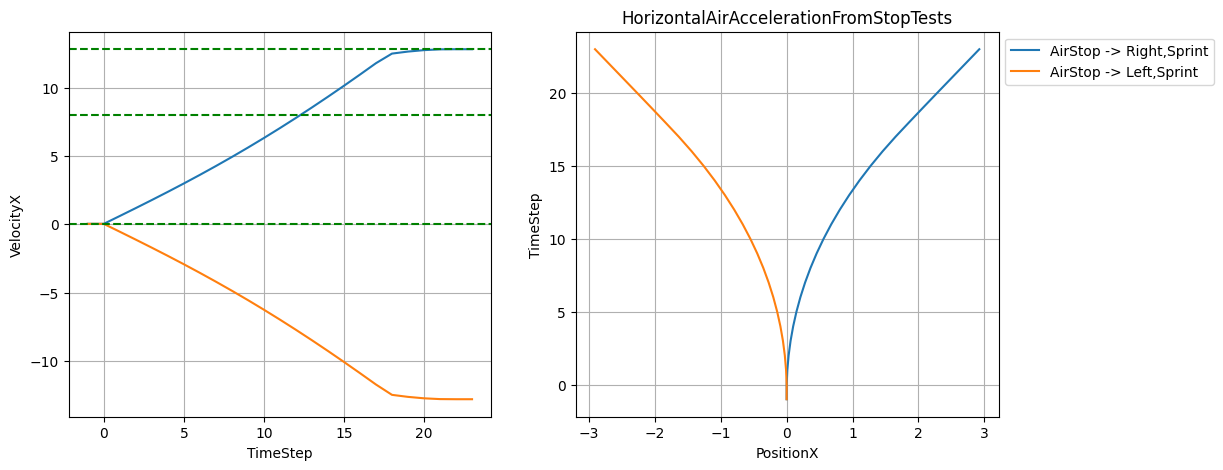

In [5]:
results = TestResults.load('HorizontalAirAccelerationFromStopTests')

if not results.hasData() or False:

    setup = [
        TestStep(actions=[], repeatCounts=[10]),
        TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[30], positionOffset={ 'x' : 10, 'y' : 0 }),

        TestStep(actions=['Left'], repeatCounts=[3]),
        TestStep(actions=['Left', 'Sprint'], repeatCounts=[7]),
        TestStep(actions=['Left'], repeatCounts=[0]),
        TestStep(actions=[], repeatCounts=[5])
    ]
    
    results.Data = TestRunner.runTests([
        TestScenario(levelName='WallJumpTests', testSteps=[
            *setup,            
            TestStep(actions=['Right', 'Sprint'], repeatCounts=[25]),
        ]),
        
        TestScenario(levelName='WallJumpTests', testSteps=[
            *setup,            
            TestStep(actions=['Left', 'Sprint'], repeatCounts=[25]),
        ]),
    ])


    results.filter(lambda d: d[d['TimeStep'] >= 54])
    results.filter(lambda d: d[d['TimeStep'] <= 24])
    results.Data['TimeStep'] -= 1

    results.renameTestCase('[](010)_[Jump,Right,Sprint](030)_[Left](003)_[Left,Sprint](007)_[Left](000)_[](005)_[Left,Sprint](025)', 'AirStop -> Left,Sprint')
    results.renameTestCase('[](010)_[Jump,Right,Sprint](030)_[Left](003)_[Left,Sprint](007)_[Left](000)_[](005)_[Right,Sprint](025)', 'AirStop -> Right,Sprint')
    results.save()

testResultSets[results.Name] = results.getTestCases()
results.plotTests([ 
    ('TimeStep', 'VelocityX'),
    ('PositionX', 'TimeStep'),
])

# Horizontal Short Stop Jump Tests

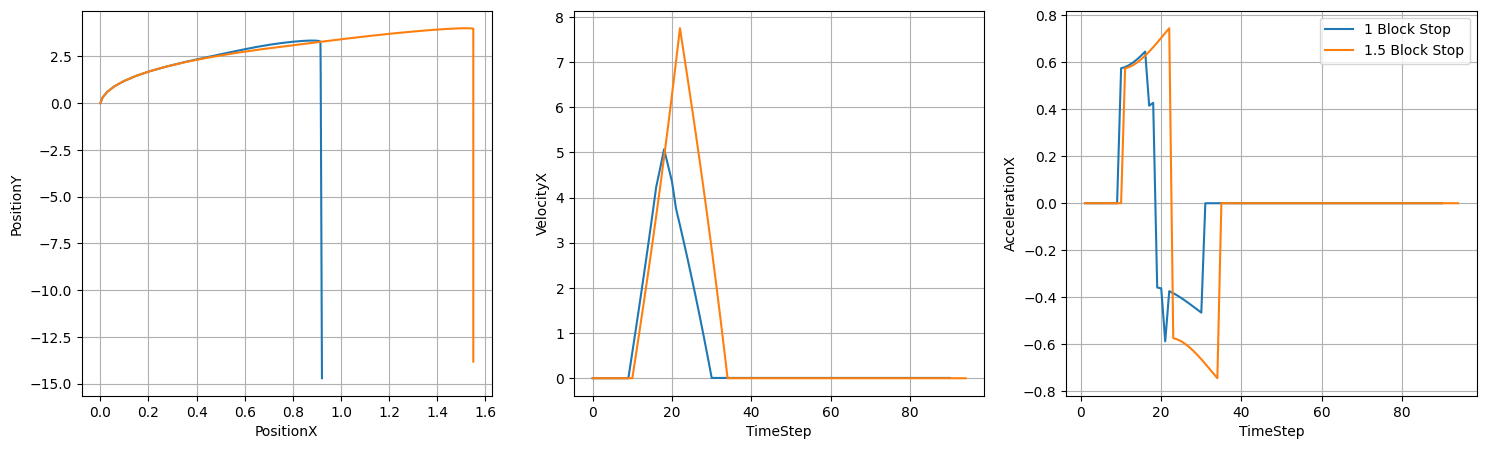

In [6]:
results = TestResults.load('HorizontalShortStopJumpTests')

if not results.hasData() or False:
    
    results.Data = TestRunner.runTests([
        # TestScenario(levelName='WallJumpTests', testSteps=[
        #     TestStep(actions=[], repeatCounts=[9]),
        #     TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[6,7,8], positionOffset={ 'x' : 5, 'y' : 0 }),
        #     TestStep(actions=['Jump', 'Right'], repeatCounts=[1,2,3]),

        #     TestStep(actions=['Left'], repeatCounts=[0,1,2]),
        #     TestStep(actions=['Left', 'Sprint'], repeatCounts=[0,1]),
        #     TestStep(actions=['Left'], repeatCounts=[7,8,9,10]),
        #     # TestStep(actions=['Left'], repeatCounts=[0,1,2,3]),
        #     TestStep(actions=[], repeatCounts=[10])
        # ]),
        TestScenario(levelName='WallJumpTests', testSteps=[
            TestStep(actions=[], repeatCounts=[9]),
            TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[7], positionOffset={ 'x' : 5, 'y' : 0 }),
            TestStep(actions=['Jump', 'Right'], repeatCounts=[2]),

            TestStep(actions=['Left'], repeatCounts=[2]),
            TestStep(actions=['Left', 'Sprint'], repeatCounts=[1]),
            TestStep(actions=['Left'], repeatCounts=[9]),
            # TestStep(actions=['Left'], repeatCounts=[0,1,2,3]),
            TestStep(actions=[], repeatCounts=[60])
        ]),
        TestScenario(levelName='WallJumpTests', testSteps=[
            TestStep(actions=[], repeatCounts=[10]),
            TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[12], positionOffset={ 'x' : 5, 'y' : 0 }),

            # TestStep(actions=['Left'], repeatCounts=[0,1,2,3]),
            TestStep(actions=['Left', 'Sprint'], repeatCounts=[12]),
            # TestStep(actions=['Left'], repeatCounts=[0,1,2,3]),
            TestStep(actions=[], repeatCounts=[60])
        ]),
    ])


    results.save()
    
    results.filter(lambda d: d[d['TimeStep'] >= 0])
        # results.filter(lambda d: d[d['TimeStep'] <= 12])

        # tests = results.getTestCases()

        # def get_abs_velocity_x(testName):
        #     return results.Data[(results.Data['TimeStep'] == 12) & (results.Data['ScenarioName'] == testName)]['VelocityX'].abs().values[0]

        # sorted_tests = sorted(tests, key=get_abs_velocity_x)
        # results.Data = results.Data[results.Data['ScenarioName'].isin(sorted_tests[:2])]
        # results.Data['TimeStep'] -= 1


    # results.filter(lambda d: d[d['TimeStep'] >= 0])
    # results.filter(lambda d: d[d['TimeStep'] <= 10])
    # def get_abs_velocity_x(testName):
    #     return results.Data[results.Data['ScenarioName'] == testName].tail(1).VelocityX.abs().values[0]

    # tests = results.getTestCases()
    # sorted_tests = sorted(tests, key=get_abs_velocity_x)
    # results.Data = results.Data[results.Data['ScenarioName'].isin(sorted_tests[:2])]
    # print(results.getTestCases())
    results.renameTestCase('[](009)_[Jump,Right,Sprint](007)_[Jump,Right](002)_[Left](002)_[Left,Sprint](001)_[Left](009)_[](060)', '1 Block Stop')
    results.renameTestCase('[](010)_[Jump,Right,Sprint](012)_[Left,Sprint](012)_[](060)', '1.5 Block Stop')

    testResultSets[results.Name] = results.getTestCases()
    results.save()


results.addAccelerations()
results.plotTests([ 
        ('PositionX', 'PositionY'),
        ('TimeStep', 'VelocityX'),
        ('TimeStep', 'AccelerationX'),
    ],
    showLegend=True, plotTitle=False, plotTargetLines=False,
    saveLocation=f'{dataAnalysisRoot}/TestResultPlots/{results.Name}.png'
)
# results.filterScenario('[](010)_[Jump,Right,Sprint](012)_[Left,Sprint](010)_[](060)')

# results.Data.groupby(['ScenarioName']).last().VelocityX

# Horizontal Ground Acceleration Tests

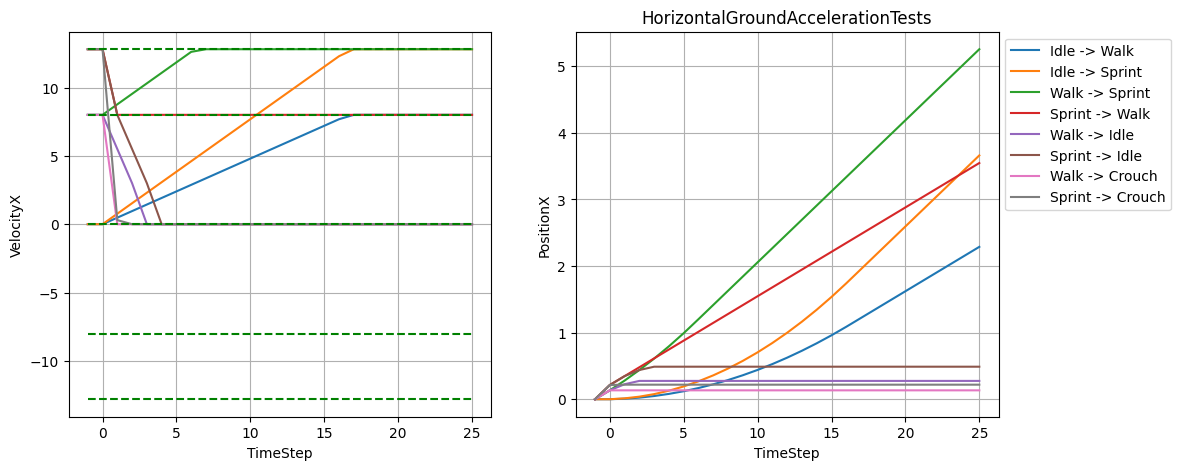

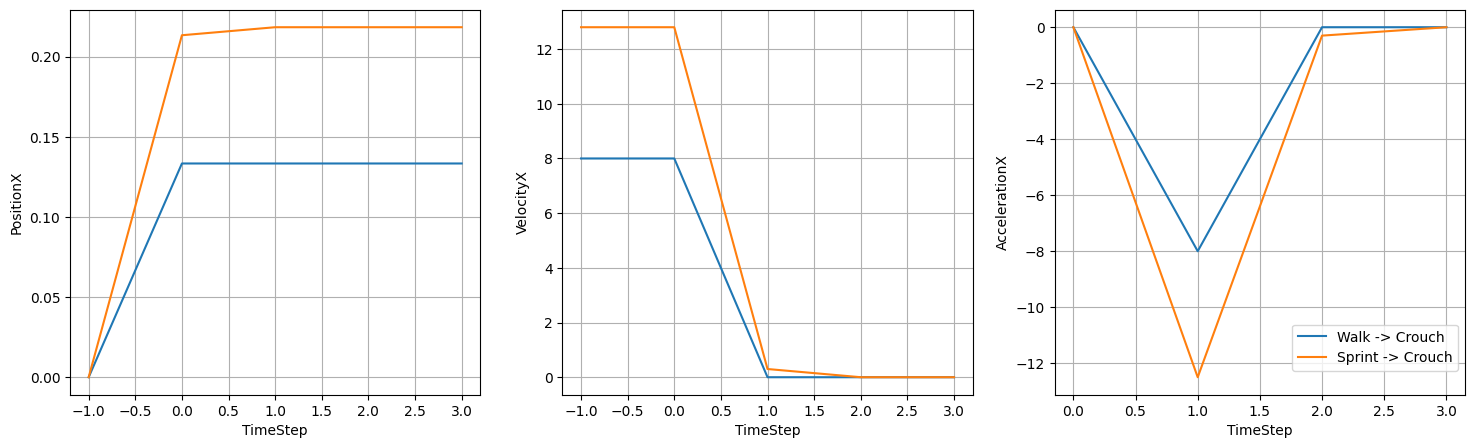

In [8]:
results = TestResults.load('HorizontalGroundAccelerationTests')

if not results.hasData() or forceTests:
    
    results.Data = TestRunner.runTests([
        TestScenario(levelName='WalkTests', testSteps=[
            TestStep(actions=[], repeatCounts=[20]),
            TestStep(actions=['Right'], repeatCounts=[25])
        ]),
        TestScenario(levelName='WalkTests', testSteps=[
            TestStep(actions=[], repeatCounts=[20]),
            TestStep(actions=['Right', 'Sprint'], repeatCounts=[25])
        ]),
        TestScenario(levelName='WalkTests', testSteps=[
            TestStep(actions=['Right'], repeatCounts=[20]),
            TestStep(actions=['Right', 'Sprint'], repeatCounts=[25])
        ]),
        TestScenario(levelName='WalkTests', testSteps=[
            TestStep(actions=['Right', 'Sprint'], repeatCounts=[20]),
            TestStep(actions=['Right'], repeatCounts=[25])
        ]),
        TestScenario(levelName='WalkTests', testSteps=[
            TestStep(actions=['Right'], repeatCounts=[20]),
            TestStep(actions=[], repeatCounts=[25])
        ]),
        TestScenario(levelName='WalkTests', testSteps=[
            TestStep(actions=['Right', 'Sprint'], repeatCounts=[20]),
            TestStep(actions=[], repeatCounts=[25])
        ]),
        TestScenario(levelName='WalkTests', testSteps=[
            TestStep(actions=['Right'], repeatCounts=[20]),
            TestStep(actions=['Down'], repeatCounts=[25])
        ]),
        TestScenario(levelName='WalkTests', testSteps=[
            TestStep(actions=['Right', 'Sprint'], repeatCounts=[20]),
            TestStep(actions=['Down'], repeatCounts=[25])
        ])
    ])

    results.filter(lambda d: d[d['TimeStep'] >= 19])
    results.Data['TimeStep'] -= 1
    
    results.renameTestCase('[](020)_[Right](025)', 'Idle -> Walk')
    results.renameTestCase('[](020)_[Right,Sprint](025)', 'Idle -> Sprint')
    results.renameTestCase('[Right](020)_[Right,Sprint](025)', 'Walk -> Sprint')
    results.renameTestCase('[Right,Sprint](020)_[Right](025)', 'Sprint -> Walk')
    results.renameTestCase('[Right](020)_[](025)', 'Walk -> Idle')
    results.renameTestCase('[Right,Sprint](020)_[](025)', 'Sprint -> Idle')
    results.renameTestCase('[Right](020)_[Down](025)', 'Walk -> Crouch')
    results.renameTestCase('[Right,Sprint](020)_[Down](025)', 'Sprint -> Crouch')
    print(results.getTestCases())

    results.save()


testResultSets[results.Name] = results.getTestCases()
results.plotTests([ 
    ('TimeStep', 'VelocityX'),
    ('TimeStep', 'PositionX'),
])


results.filterScenario(['Walk -> Crouch', 'Sprint -> Crouch'])
results.filterTime(0, 4)
results.Data['TimeStep'] -= 1


results.addAccelerations()
results.plotTests([ 
        ('TimeStep', 'PositionX'),
        ('TimeStep', 'VelocityX'),
        ('TimeStep', 'AccelerationX'),
    ],
    showLegend=True, plotTitle=False, plotTargetLines=False, legenPosition=(1, 0.2),
    saveLocation=f'{dataAnalysisRoot}/TestResultPlots/HorizontalGroundStopTests.png'
)

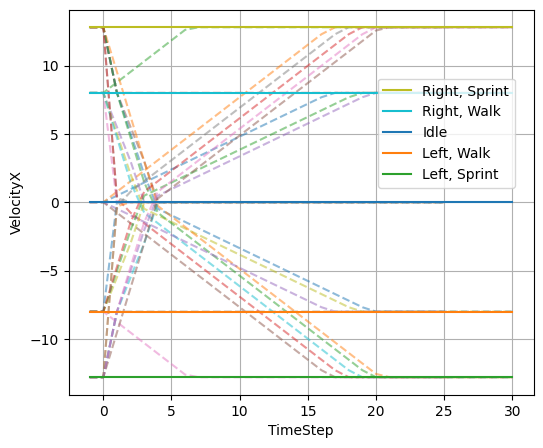

In [2]:
results = TestResults.load('HorizontalGroundAccelerationTests')
results2 = TestResults.load('HorizontalGroundTurnaroundTests')
results.Data = pd.concat([results.Data, results2.Data], ignore_index=True)

results.renameTestCase('Walk -> Crouch', 'Right -> Crouch')
results.renameTestCase('Walk -> Idle', 'Right -> Idle')
results.renameTestCase('Sprint -> Crouch', 'Sprint,Right -> Crouch')
results.renameTestCase('Sprint -> Idle', 'Sprint,Right -> Idle')
results.renameTestCase('Idle -> Walk', 'Idle -> Right')
results.renameTestCase('Idle -> Sprint', 'Idle -> Sprint,Right')
results.renameTestCase('Walk -> Sprint', 'Right -> Sprint,Right')
results.renameTestCase('Sprint -> Walk', 'Sprint,Right -> Right')

invertedData = results.Data.copy()
invertedData['VelocityX'] *= -1
invertedData['ScenarioName'] += ' (Inverted)'
results.Data = pd.concat([results.Data, invertedData], ignore_index=False)
results.plotTests([ 
    ('TimeStep', 'VelocityX')
], showLegend=True, plotTitle=False, alpha=0.5, lineStyle='--', targetLineStyle='-', targetLineColor=None, addLabels=False,
legenPosition=(0.65, 0.52),
saveLocation=f'{dataAnalysisRoot}/TestResultPlots/StableVelocityStatesGround.png')

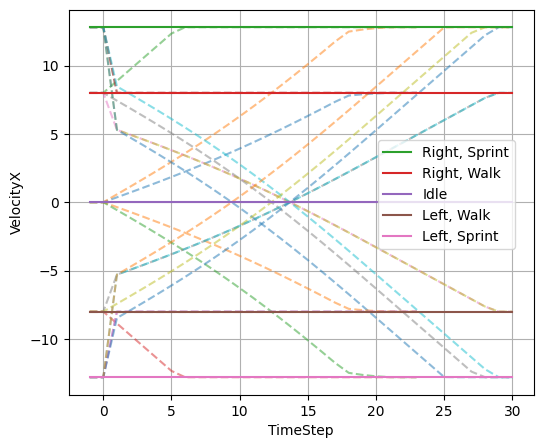

In [45]:
results = TestResults.load('HorizontalAirAccelerationTests')
results2 = TestResults.load('HorizontalAirTurnaroundTests')
results.Data = pd.concat([results.Data, results2.Data], ignore_index=True)

results.renameTestCase('Walk -> Crouch', 'Right -> Crouch')
results.renameTestCase('Walk -> Idle', 'Right -> Idle')
results.renameTestCase('Sprint -> Crouch', 'Sprint,Right -> Crouch')
results.renameTestCase('Sprint -> Idle', 'Sprint,Right -> Idle')
results.renameTestCase('Idle -> Walk', 'Idle -> Right')
results.renameTestCase('Idle -> Sprint', 'Idle -> Sprint,Right')
results.renameTestCase('Walk -> Sprint', 'Right -> Sprint,Right')
results.renameTestCase('Sprint -> Walk', 'Sprint,Right -> Right')

invertedData = results.Data.copy()
invertedData['VelocityX'] *= -1
invertedData['ScenarioName'] += ' (Inverted)'
results.Data = pd.concat([results.Data, invertedData], ignore_index=False)
results.plotTests([ 
    ('TimeStep', 'VelocityX')
], showLegend=True, plotTitle=False, alpha=0.5, lineStyle='--', targetLineStyle='-', targetLineColor=None, addLabels=False,
legenPosition=(0.65, 0.52),
saveLocation=f'{dataAnalysisRoot}/TestResultPlots/StableVelocityStatesAir.png')

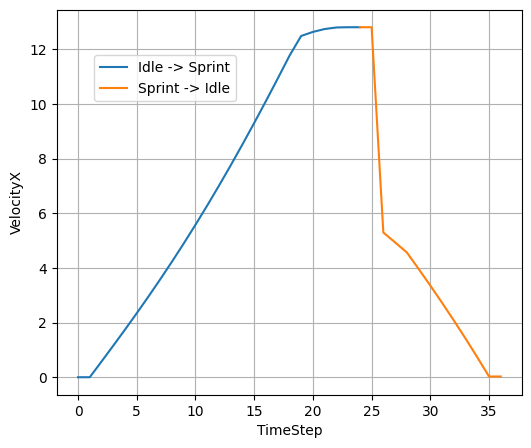

In [102]:
results = TestResults.load('HorizontalAirAccelerationTests')
results.filterScenario(['Idle -> Sprint'])
stopResults = TestResults.load('HorizontalAirStopTests')
stopResults.filterScenario(['Sprint -> Idle'])
stopResults.Data['TimeStep'] += 24

results.Data = pd.concat([results.Data, stopResults.Data], ignore_index=True)


results.plotTests([ 
    ('TimeStep', 'VelocityX')
], showLegend=True, plotTitle=False, alpha=1, plotTargetLines=False, lineStyle='-', addLabels=True,
legenPosition=(0.4, 0.9),
saveLocation=f'{dataAnalysisRoot}/TestResultPlots/AirAccelerationAndStopping.png')

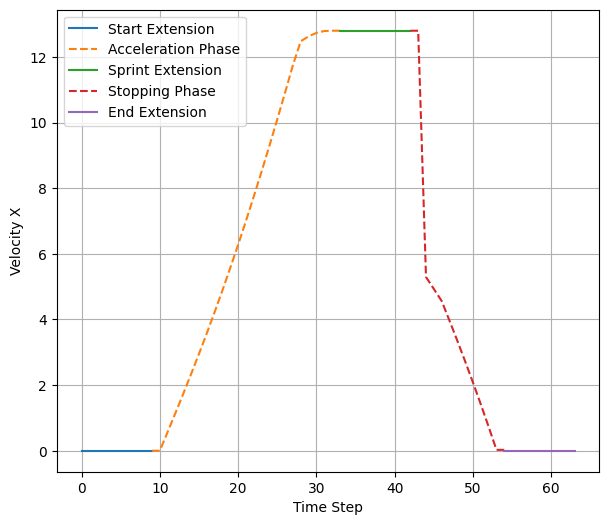

In [103]:
from utils.PlotTools import PlotTools


plot = PlotTools.create(facecolor='white', figsize=(7, 6))

accelerationData = TestResults.load('HorizontalAirAccelerationTests')
accelerationData.filterScenario(['Idle -> Sprint'])
accelerationData.Data['TimeStep'] += 9
accelerationData = accelerationData.Data

stopResults = TestResults.load('HorizontalAirStopTests')
stopResults.filterScenario(['Sprint -> Idle'])
stopResults.Data['TimeStep'] += 42
stopResults = stopResults.Data

startExtension = pd.concat([accelerationData.head(1)] * 10).reset_index(drop=True)
startExtension['TimeStep'] = startExtension.index
startExtension['VelocityX'] = 0
startExtension['ScenarioName'] = 'Start Extension'

centerExtension = pd.concat([accelerationData.tail(1)] * 10).reset_index(drop=True)
centerExtension['TimeStep'] = startExtension.index + 33
centerExtension['VelocityX'] = 12.8
centerExtension['ScenarioName'] = 'Center Extension'

endExtension = pd.concat([accelerationData.head(1)] * 10).reset_index(drop=True)
endExtension['TimeStep'] = startExtension.index + 54
endExtension['VelocityX'] = 0
endExtension['ScenarioName'] = 'End Extension'


plot.axis[0].plot(startExtension['TimeStep'], startExtension['VelocityX'], label='Start Extension')
plot.axis[0].plot(accelerationData['TimeStep'], accelerationData['VelocityX'], label='Acceleration Phase', linestyle='--')
plot.axis[0].plot(centerExtension['TimeStep'], centerExtension['VelocityX'], label='Sprint Extension')
plot.axis[0].plot(stopResults['TimeStep'], stopResults['VelocityX'], label='Stopping Phase', linestyle='--')
plot.axis[0].plot(endExtension['TimeStep'], endExtension['VelocityX'], label='End Extension')
plot.axis[0].set_xlabel('Time Step')
plot.axis[0].set_ylabel('Velocity X')
plot.axis[0].legend()
plot.axis[0].grid()
plot.fig.savefig(f'{dataAnalysisRoot}/TestResultPlots/ProlongedAirAccelerationAndStopping.png', dpi=300, bbox_inches='tight')

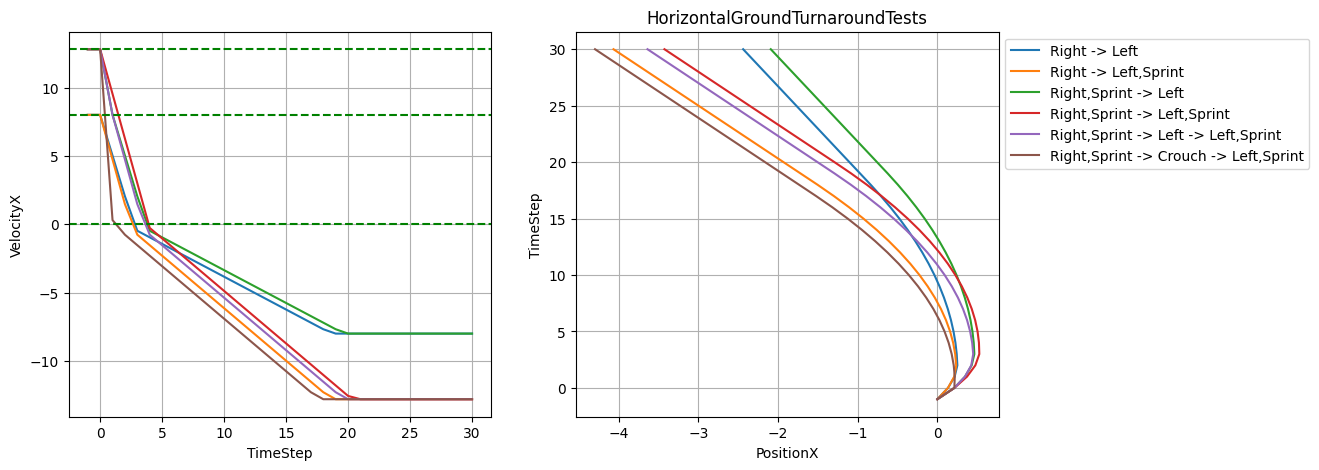

In [8]:
results = TestResults.load('HorizontalGroundTurnaroundTests')

if not results.hasData() or forceTests:
    
    results.Data = TestRunner.runTests([
        TestScenario(levelName='WalkTests', testSteps=[
            TestStep(actions=['Right'], repeatCounts=[20]),
            TestStep(actions=['Left'], repeatCounts=[36])
        ]),
        TestScenario(levelName='WalkTests', testSteps=[
            TestStep(actions=['Right'], repeatCounts=[20]),
            TestStep(actions=['Left', 'Sprint'], repeatCounts=[36])
        ]),
        TestScenario(levelName='WalkTests', testSteps=[
            TestStep(actions=['Right', 'Sprint'], repeatCounts=[20]),
            TestStep(actions=['Left'], repeatCounts=[36])
        ]),
        TestScenario(levelName='WalkTests', testSteps=[
            TestStep(actions=['Right', 'Sprint'], repeatCounts=[20]),
            TestStep(actions=['Left', 'Sprint'], repeatCounts=[36])
        ]),
        TestScenario(levelName='WalkTests', testSteps=[
            TestStep(actions=['Right', 'Sprint'], repeatCounts=[20]),
            TestStep(actions=['Left'], repeatCounts=[1]),
            TestStep(actions=['Left', 'Sprint'], repeatCounts=[35])
        ]),
        TestScenario(levelName='WalkTests', testSteps=[
            TestStep(actions=['Right', 'Sprint'], repeatCounts=[20]),
            TestStep(actions=['Down'], repeatCounts=[1]),
            TestStep(actions=['Left', 'Sprint'], repeatCounts=[35])
        ])
    ])

    results.filter(lambda d: d[d['TimeStep'] >= 19])
    results.filter(lambda d: d[d['TimeStep'] <= 31])
    results.Data['TimeStep'] -= 1

    results.renameTestCase('[Right](020)_[Left](036)', 'Right -> Left')
    results.renameTestCase('[Right](020)_[Left,Sprint](036)', 'Right -> Left,Sprint')
    results.renameTestCase('[Right,Sprint](020)_[Left](036)', 'Right,Sprint -> Left')
    results.renameTestCase('[Right,Sprint](020)_[Left,Sprint](036)', 'Right,Sprint -> Left,Sprint')
    results.renameTestCase('[Right,Sprint](020)_[Left](001)_[Left,Sprint](035)', 'Right,Sprint -> Left -> Left,Sprint')
    results.renameTestCase('[Right,Sprint](020)_[Down](001)_[Left,Sprint](035)', 'Right,Sprint -> Crouch -> Left,Sprint')
    print(results.getTestCases())

    results.save()

testResultSets[results.Name] = results.getTestCases()
results.plotTests([ 
    ('TimeStep', 'VelocityX'),
    ('PositionX', 'TimeStep'),
])

# Horizontal Wall Jump Acceleration Tests

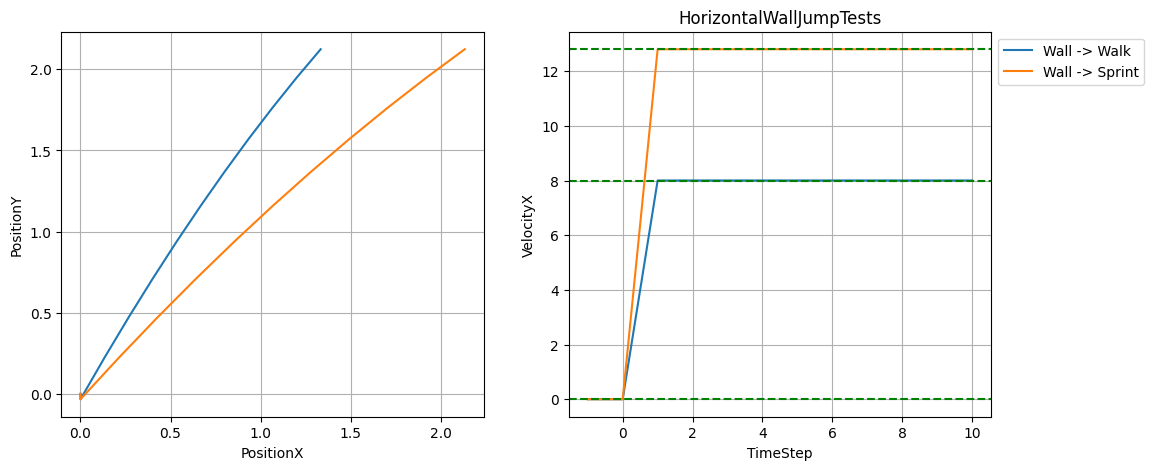

In [9]:
results = TestResults.load('HorizontalWallJumpTests')

if not results.hasData() or forceTests:
    
    results.Data = TestRunner.runTests([
        TestScenario(levelName='WallJumpTests', testSteps=[
            TestStep(actions=[], repeatCounts=[5]),
            TestStep(actions=['Right'], repeatCounts=[30]),
            TestStep(actions=['Left', 'Sprint', 'Up'], repeatCounts=[60]),
            TestStep(actions=['Jump', 'Right'], repeatCounts=[30]),
        ]),
        TestScenario(levelName='WallJumpTests', testSteps=[
            TestStep(actions=[], repeatCounts=[5]),
            TestStep(actions=['Right'], repeatCounts=[30]),
            TestStep(actions=['Left', 'Sprint', 'Up'], repeatCounts=[60]),
            TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[30]),
        ])
    ])
    
    results.filter(lambda d: d[d['TimeStep'] >= 94])
    results.filter(lambda d: d[d['TimeStep'] <= 11])
    results.Data['TimeStep'] -= 1
    results.Data.loc[results.Data['TimeStep'] <= 0, 'VelocityX'] = 0
    
    results.renameTestCase('[](005)_[Right](030)_[Left,Sprint,Up](060)_[Jump,Right](030)', 'Wall -> Walk')
    results.renameTestCase('[](005)_[Right](030)_[Left,Sprint,Up](060)_[Jump,Right,Sprint](030)', 'Wall -> Sprint')
    print(results.getTestCases())

    results.save()

testResultSets[results.Name] = results.getTestCases()
results.plotTests([ 
    ('PositionX', 'PositionY'),
    ('TimeStep', 'VelocityX'),
])

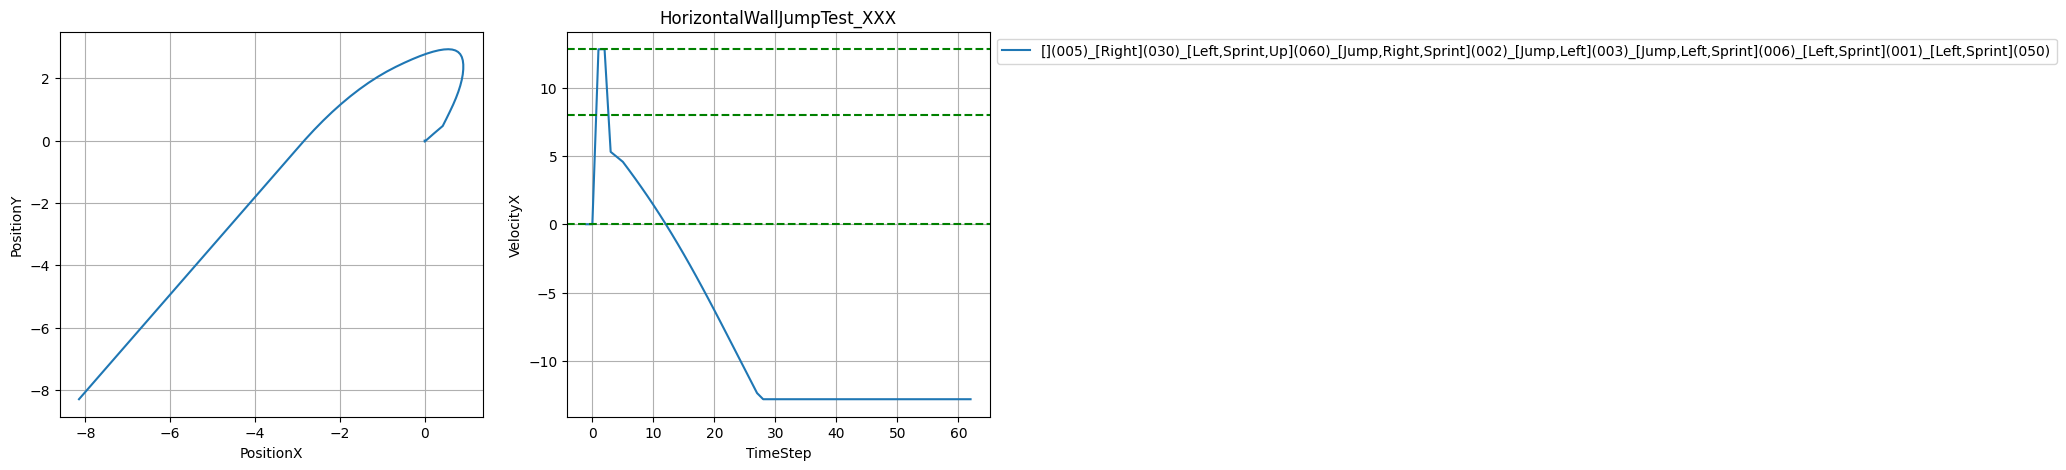

In [10]:
results = TestResults.load('HorizontalWallJumpTest_XXX')

if not results.hasData() or False:
    
    results.Data = TestRunner.runTests([
        TestScenario(levelName='WallJumpTests', testSteps=[
            TestStep(actions=[], repeatCounts=[5]),
            TestStep(actions=['Right'], repeatCounts=[30]),
            TestStep(actions=['Left', 'Sprint', 'Up'], repeatCounts=[60]),
            TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[2]),
            TestStep(actions=['Jump', 'Left'], repeatCounts=[3], positionOffset={'x': 10}),
            TestStep(actions=['Jump', 'Left', 'Sprint'], repeatCounts=[6]),
            TestStep(actions=['Left', 'Sprint'], repeatCounts=[1]),
            # TestStep(actions=[], repeatCounts=[1]),
            TestStep(actions=['Left', 'Sprint'], repeatCounts=[50]),
        ])
    ])
    
    # results.filter(lambda d: d[d['TimeStep'] >= 94])
    # results.filter(lambda d: d[d['TimeStep'] <= 11])
    # results.Data['TimeStep'] -= 1
    # results.Data.loc[results.Data['TimeStep'] <= 0, 'VelocityX'] = 0
    
    # results.renameTestCase('[](005)_[Right](030)_[Left,Sprint,Up](060)_[Jump,Right](030)', 'Wall -> Walk')
    # results.renameTestCase('[](005)_[Right](030)_[Left,Sprint,Up](060)_[Jump,Right,Sprint](030)', 'Wall -> Sprint')
    # print(results.getTestCases())

    results.save()

results.filter(lambda d: d[d['TimeStep'] >= 94])
results.Data['TimeStep'] -= 1
testResultSets[results.Name] = results.getTestCases()
results.plotTests([ 
    ('PositionX', 'PositionY'),
    ('TimeStep', 'VelocityX'),
])

# Horizontal Quick Wall  Jump Acceleration Tests

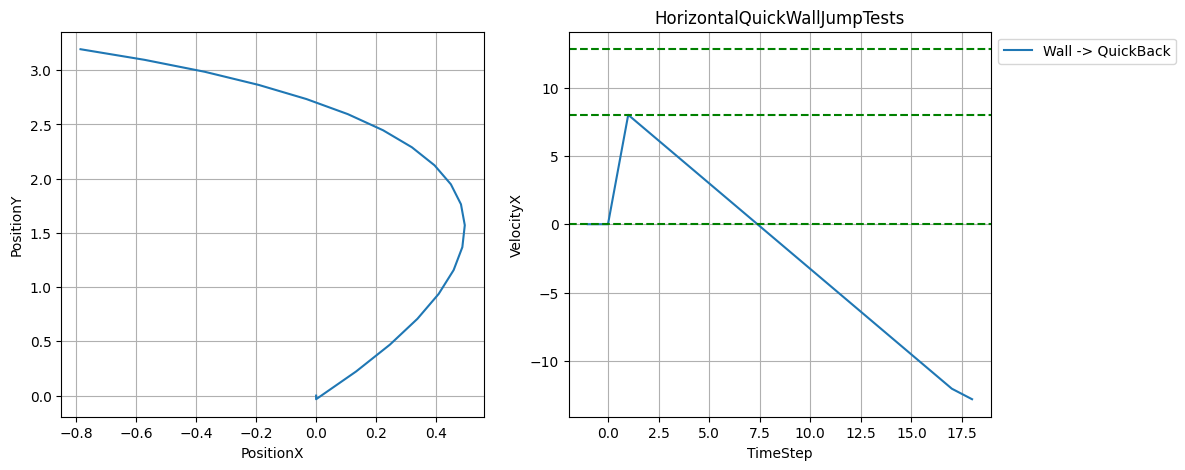

In [11]:
results = TestResults.load('HorizontalQuickWallJumpTests')

if not results.hasData() or forceTests:
    
    results.Data = TestRunner.runTests([
        TestScenario(levelName='WallJumpTests', testSteps=[
            TestStep(actions=[], repeatCounts=[5]),
            TestStep(actions=['Right'], repeatCounts=[30]),
            TestStep(actions=['Left', 'Sprint', 'Up'], repeatCounts=[60]),
            TestStep(actions=['Jump', 'Left'], repeatCounts=[1]),
            TestStep(actions=['Jump', 'Left', 'Sprint'], repeatCounts=[30], positionOffset={'X': 10}),
        ])
    ])
    
    print(results.getTestCases())
    results.filter(lambda d: d[d['TimeStep'] >= 94])
    results.filter(lambda d: d[d['TimeStep'] <= 19])
    results.Data['TimeStep'] -= 1
    # results.Data.loc[results.Data['TimeStep'] <= 0, 'VelocityX'] = 0

    results.renameTestCase('[](005)_[Right](030)_[Left,Sprint,Up](060)_[Jump,Left](001)_[Jump,Left,Sprint](030)', 'Wall -> QuickBack')
    results.Data.loc[results.Data['TimeStep'] <= 0, ['VelocityX', 'VelocityY']] = 0
    
    results.save()

testResultSets[results.Name] = results.getTestCases()
results.plotTests([ 
    ('PositionX', 'PositionY'),
    ('TimeStep', 'VelocityX'),
])

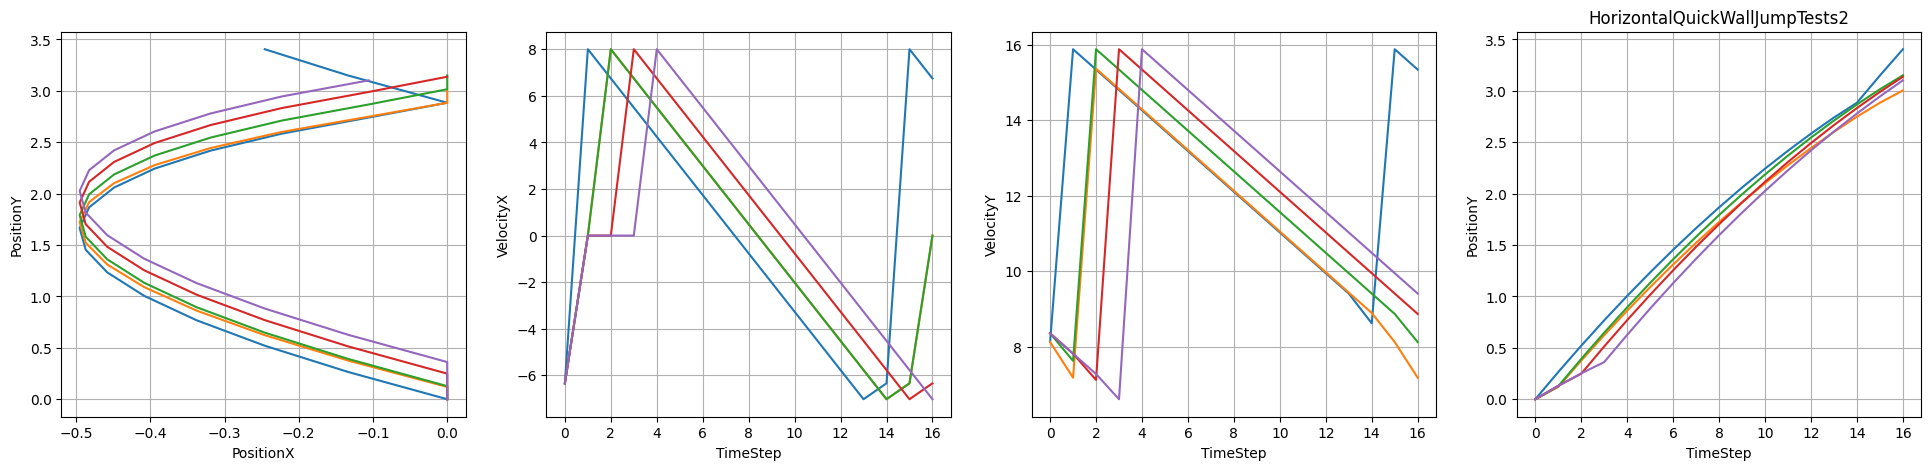

In [12]:
results = TestResults.load('HorizontalQuickWallJumpTests2')

if not results.hasData() or False:

    def createQuickJump(frames, pause):
        return [
            TestStep(actions=['Jump', 'Left'], repeatCounts=[1]),
            TestStep(actions=['Jump', 'Left', 'Sprint'], repeatCounts=[frames]),
            TestStep(actions=['Left', 'Sprint'], repeatCounts=[pause]),
        ]
    
    results.Data = TestRunner.runTests([
        TestScenario(levelName='WallJumpTests', testSteps=[
            TestStep(actions=[], repeatCounts=[10]),
            TestStep(actions=['Left', 'Sprint', 'Up'], repeatCounts=[10], positionOffset={'x': 2.5, 'y': -30}),
            *createQuickJump(12, 1),
            *createQuickJump(12, 1),
            *createQuickJump(12, 1),
            TestStep(actions=['Jump', 'Right', 'Sprint', 'Up'], repeatCounts=[30]),
        ]),
        TestScenario(levelName='WallJumpTests', testSteps=[
            TestStep(actions=[], repeatCounts=[10]),
            TestStep(actions=['Left', 'Sprint', 'Up'], repeatCounts=[10], positionOffset={'x': 2.5, 'y': -30}),
            *createQuickJump(12, 2),
            *createQuickJump(12, 2),
            *createQuickJump(12, 2),
            TestStep(actions=['Jump', 'Right', 'Sprint', 'Up'], repeatCounts=[30]),
        ]),
        TestScenario(levelName='WallJumpTests', testSteps=[
            TestStep(actions=[], repeatCounts=[10]),
            TestStep(actions=['Left', 'Sprint', 'Up'], repeatCounts=[10], positionOffset={'x': 2.5, 'y': -30}),
            *createQuickJump(13, 1),
            *createQuickJump(13, 1),
            *createQuickJump(13, 1),
            TestStep(actions=['Jump', 'Right', 'Sprint', 'Up'], repeatCounts=[30]),
        ]),
        TestScenario(levelName='WallJumpTests', testSteps=[
            TestStep(actions=[], repeatCounts=[10]),
            TestStep(actions=['Left', 'Sprint', 'Up'], repeatCounts=[10], positionOffset={'x': 2.5, 'y': -30}),
            *createQuickJump(14, 1),
            *createQuickJump(14, 1),
            *createQuickJump(14, 1),
            TestStep(actions=['Jump', 'Right', 'Sprint', 'Up'], repeatCounts=[30]),
        ]),
        TestScenario(levelName='WallJumpTests', testSteps=[
            TestStep(actions=[], repeatCounts=[10]),
            TestStep(actions=['Left', 'Sprint', 'Up'], repeatCounts=[10], positionOffset={'x': 2.5, 'y': -30}),
            *createQuickJump(15, 1),
            *createQuickJump(15, 1),
            *createQuickJump(15, 1),
            TestStep(actions=['Jump', 'Right', 'Sprint', 'Up'], repeatCounts=[30]),
        ]),
    ])
    
    print(results.getTestCases())
    # results.filter(lambda d: d[d['TimeStep'] >= 94])
    # results.filter(lambda d: d[d['TimeStep'] <= 19])
    # results.Data['TimeStep'] -= 1
    # # results.Data.loc[results.Data['TimeStep'] <= 0, 'VelocityX'] = 0

    # results.renameTestCase('[](005)_[Right](030)_[Left,Sprint,Up](060)_[Jump,Left](001)_[Jump,Left,Sprint](030)', 'Wall -> QuickBack')
    # results.Data.loc[results.Data['TimeStep'] <= 0, ['VelocityX', 'VelocityY']] = 0
    
    results.save()

results.filter(lambda d: d[(d.TimeStep >= 34) & (d.TimeStep <= 50)])
results.Data['PositionX'] *= -1

testResultSets[results.Name] = results.getTestCases()
results.plotTests([ 
    ('PositionX', 'PositionY'),
    ('TimeStep', 'VelocityX'),
    ('TimeStep', 'VelocityY'),
    ('TimeStep', 'PositionY'),
], showLegend=False, plotTargetLines=False)

# Corner Jump Tests

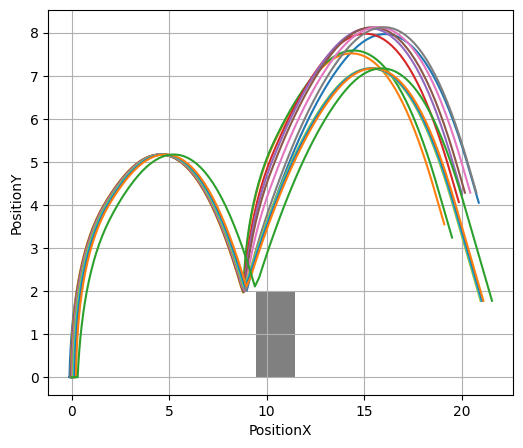

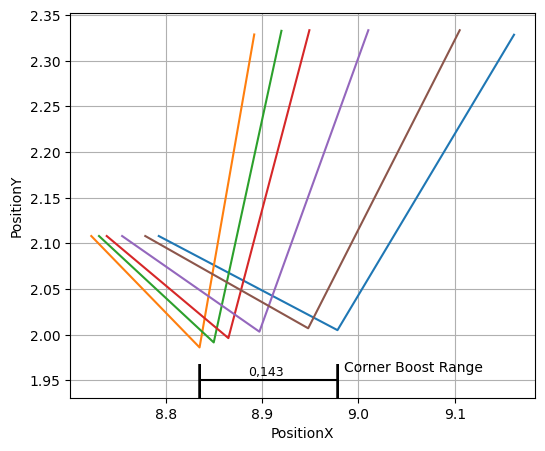

In [15]:
results = TestResults.load('CornerJumpTests')

if not results.hasData() or False:
    
    results.Data = TestRunner.runTests([
        TestScenario(levelName='CornerTests', testSteps=[
            TestStep(actions=[], repeatCounts=[4]),
            TestStep(actions=['Left'], repeatCounts=[5]),
            TestStep(actions=['Right'], repeatCounts=[1]),
            TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[46]),
            TestStep(actions=['Right', 'Sprint'], repeatCounts=[1]),
            TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[60])
        ]),
        TestScenario(levelName='CornerTests', testSteps=[
            TestStep(actions=[], repeatCounts=[6]),
            TestStep(actions=['Left'], repeatCounts=[3]),
            TestStep(actions=[], repeatCounts=[1]),
            TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[46]),
            TestStep(actions=['Right', 'Sprint'], repeatCounts=[1]),
            TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[60])
        ]),
        TestScenario(levelName='CornerTests', testSteps=[
            TestStep(actions=[], repeatCounts=[6]),
            TestStep(actions=['Left'], repeatCounts=[2]),
            TestStep(actions=[], repeatCounts=[2]),
            TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[46]),
            TestStep(actions=['Right', 'Sprint'], repeatCounts=[1]),
            TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[60])
        ]),
        TestScenario(levelName='CornerTests', testSteps=[
            TestStep(actions=[], repeatCounts=[6]),
            TestStep(actions=['Left'], repeatCounts=[1]),
            TestStep(actions=[], repeatCounts=[3]),
            TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[46]),
            TestStep(actions=['Right', 'Sprint'], repeatCounts=[1]),
            TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[60])
        ]),
        TestScenario(levelName='CornerTests', testSteps=[
            TestStep(actions=[], repeatCounts=[10]),
            TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[46]),
            TestStep(actions=['Right', 'Sprint'], repeatCounts=[1]),
            TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[60])
        ]),
        TestScenario(levelName='CornerTests', testSteps=[
            TestStep(actions=[], repeatCounts=[6]),
            TestStep(actions=['Right'], repeatCounts=[1]),
            TestStep(actions=[], repeatCounts=[3]),
            TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[46]),
            TestStep(actions=['Right', 'Sprint'], repeatCounts=[1]),
            TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[60])
        ]),
        TestScenario(levelName='CornerTests', testSteps=[
            TestStep(actions=[], repeatCounts=[6]),
            TestStep(actions=['Right'], repeatCounts=[2]),
            TestStep(actions=[], repeatCounts=[2]),
            TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[46]),
            TestStep(actions=['Right', 'Sprint'], repeatCounts=[1]),
            TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[60])
        ]),
        TestScenario(levelName='CornerTests', testSteps=[
            TestStep(actions=[], repeatCounts=[6]),
            TestStep(actions=['Right'], repeatCounts=[3]),
            TestStep(actions=[], repeatCounts=[1]),
            TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[46]),
            TestStep(actions=['Right', 'Sprint'], repeatCounts=[1]),
            TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[60])
        ]),
        TestScenario(levelName='CornerTests', testSteps=[
            TestStep(actions=[], repeatCounts=[5]),
            TestStep(actions=['Right'], repeatCounts=[4]),
            TestStep(actions=[], repeatCounts=[1]),
            TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[46]),
            TestStep(actions=['Right', 'Sprint'], repeatCounts=[1]),
            TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[60])
        ]),
        TestScenario(levelName='CornerTests', testSteps=[
            TestStep(actions=[], repeatCounts=[4]),
            TestStep(actions=['Right'], repeatCounts=[5]),
            TestStep(actions=[], repeatCounts=[1]),
            TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[46]),
            TestStep(actions=['Right', 'Sprint'], repeatCounts=[1]),
            TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[60])
        ]),
        TestScenario(levelName='CornerTests', testSteps=[
            TestStep(actions=[], repeatCounts=[3]),
            TestStep(actions=['Right'], repeatCounts=[6]),
            TestStep(actions=[], repeatCounts=[1]),
            TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[46]),
            TestStep(actions=['Right', 'Sprint'], repeatCounts=[1]),
            TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[60])
        ]),
        TestScenario(levelName='CornerTests', testSteps=[
            TestStep(actions=[], repeatCounts=[2]),
            TestStep(actions=['Right'], repeatCounts=[7]),
            TestStep(actions=[], repeatCounts=[1]),
            TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[46]),
            TestStep(actions=['Right', 'Sprint'], repeatCounts=[1]),
            TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[60])
        ]),
        TestScenario(levelName='CornerTests', testSteps=[
            TestStep(actions=[], repeatCounts=[1]),
            TestStep(actions=['Right'], repeatCounts=[8]),
            TestStep(actions=[], repeatCounts=[1]),
            TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[46]),
            TestStep(actions=['Right', 'Sprint'], repeatCounts=[1]),
            TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[60])
        ]),
    ])

    results.save()

def plotBlock(ax:list[axis.Axis]):
    x1, y1 = 9.45, 0
    x = np.array([x1, x1+2, x1+2, x1, x1])
    y = np.array([y1, y1, y1+2, y1+2, y1])
    ax.fill(x, y, 'gray', alpha=1, fill=True, linewidth=1, edgecolor=None, zorder=-1)
    pass

    
results.filter(lambda d: d)
# results.filter(lambda d: d[d['TimeStep'] < 54])
# results.Data['TimeStep'] -= 1

testResultSets[results.Name] = results.getTestCases()
results.addAccelerations()
results.plotTests([ 
    ('PositionX', 'PositionY')
], showLegend=False, plotTitle=False,
   saveLocation=f'{dataAnalysisRoot}/TestResultPlots/{results.Name}.png',
   plotCallback=plotBlock)



# d[d.VelocityY > 19]


testCases = []

for test in results.getTestCases():
    d = results.Data
    d = d[d.ScenarioName == test]
    d = d[['ScenarioName', 'TimeStep', 'PositionX', 'VelocityX', 'VelocityY', 'AccelerationX', 'AccelerationY']].reset_index(drop=True)
    if d.VelocityY.max() < 19.5:
        continue
    i = np.argmax(d.VelocityY)
    
    testCases.append(test)


results.filterScenario(testCases)
results.filterTime(60, 2, reset_position=False, reset_time_steps=True)
results.moveStartTime(1)


positionX = []

for test in results.getTestCases():
    d = results.Data
    d = d[d.ScenarioName == test]
    d = d[['ScenarioName', 'TimeStep', 'PositionX', 'PositionY', 'VelocityX', 'VelocityY', 'AccelerationX', 'AccelerationY']].reset_index(drop=True)
    i = np.argmin(d.PositionY)
    positionX.append(d.loc[i, 'PositionX'])

diff = max(positionX) - min(positionX)

def add_interval(ax, xdata, ydata, caps="  "):
    line = ax.add_line(mpl.lines.Line2D(xdata, ydata, color='black'))
    anno_args = {
        'ha': 'center',
        'va': 'center',
        'size': 24,
        'color': 'black'
    }
    a0 = ax.annotate(caps[0], xy=(xdata[0], ydata[0]), **anno_args)
    a1 = ax.annotate(caps[1], xy=(xdata[1], ydata[1]), **anno_args)
    return (line,(a0,a1))

def plotDistance(ax: list[axis.Axis]):
    x1 = min(positionX)
    x2 = max(positionX)
    add_interval(ax, [x1, x2], [1.95, 1.95], "||")
    ax.text(x1+0.05, 1.955, str(round(x2-x1, 3)).replace('.', ','), color='black', fontsize=9, zorder=10)
    ax.text(x1+0.15, 1.96, 'Corner Boost Range', color='black', fontsize=10, zorder=10)
    

results.plotTests([ 
        ('PositionX', 'PositionY'),
    ], showLegend=False, plotTitle=False,
    saveLocation=f'{dataAnalysisRoot}/TestResultPlots/{results.Name}_Zoom.png',
    plotCallback=plotDistance
)


# Vertical Jump Acceleration Tests (From Ground, From Wall)

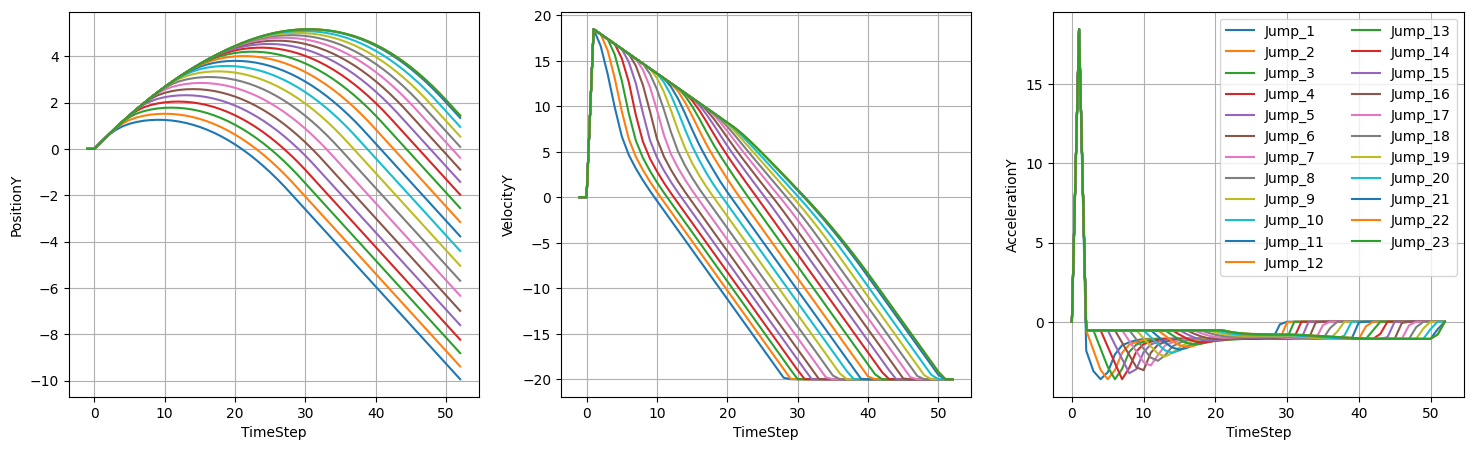

In [24]:
results = TestResults.load('VerticalGroundJumpTests')

if not results.hasData() or forceTests:
    
    results.Data = TestRunner.runTests([
        TestScenario(levelName='WallJumpTests', testSteps=[
            TestStep(actions=[], repeatCounts=[5]),
            TestStep(actions=['Jump', 'Right', 'Sprint'], 
                     repeatCounts=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
                     positionOffset={ 'x': 5, 'y': 0 }),
            TestStep(actions=[], repeatCounts=[60])
        ])    
    ])
    
    results.filter(lambda d: d[d['TimeStep'] >= 4])
    results.filter(lambda d: d[d['TimeStep'] < 54])
    results.Data['TimeStep'] -= 1

    for test in results.getTestCases():
        results.renameTestCase(test, 'Jump_'+str(int(test.split('_')[1][-4:-1])))

    results.save()

testResultSets[results.Name] = results.getTestCases()
results.addAccelerations()
results.plotTests([ 
    ('TimeStep', 'PositionY'),
    ('TimeStep', 'VelocityY'),
    ('TimeStep', 'AccelerationY'),
], showLegend=True, plotTitle=False, plotTargetLines=False,
   saveLocation=f'{dataAnalysisRoot}/TestResultPlots/{results.Name}.png')

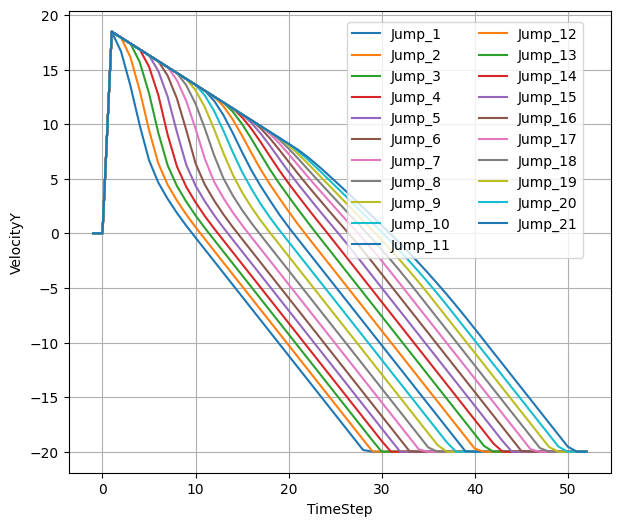

In [27]:
results.filterScenario(['Jump_1', 'Jump_2', 'Jump_3', 'Jump_4', 'Jump_5', 'Jump_6', 'Jump_7', 'Jump_8', 'Jump_9', 'Jump_10', 'Jump_11', 'Jump_12', 'Jump_13', 'Jump_14', 'Jump_15', 'Jump_16', 'Jump_17', 'Jump_18', 'Jump_19', 'Jump_20', 'Jump_21'])
results.Data['TimeStep'] -= 1
results.plotTests([
    ('TimeStep', 'VelocityY')
], showLegend=True, plotTitle=False, plotTargetLines=False, plotSize=(7,6),
   legenPosition=(0.5, 0.45),
   saveLocation=f'{dataAnalysisRoot}/TestResultPlots/VerticalGroundJumpBehavior.png')

In [15]:
# from models.actions.VerticalActionSeries import *

# data = VerticalActionSeries('VerticalGroundJumpTests', 'Jump_18', 0, 60, MotionState.OnGround).Data

# data['AccelerationY'] = data['VelocityY'].diff()
# data

In [16]:
# data = results.Data[results.Data['ScenarioName'] == 'Jump_18']
# data = data[['Actions', 'VelocityY']]
# data['AccelerationY'] = data['VelocityY'].diff()
# data.reset_index(drop=True)


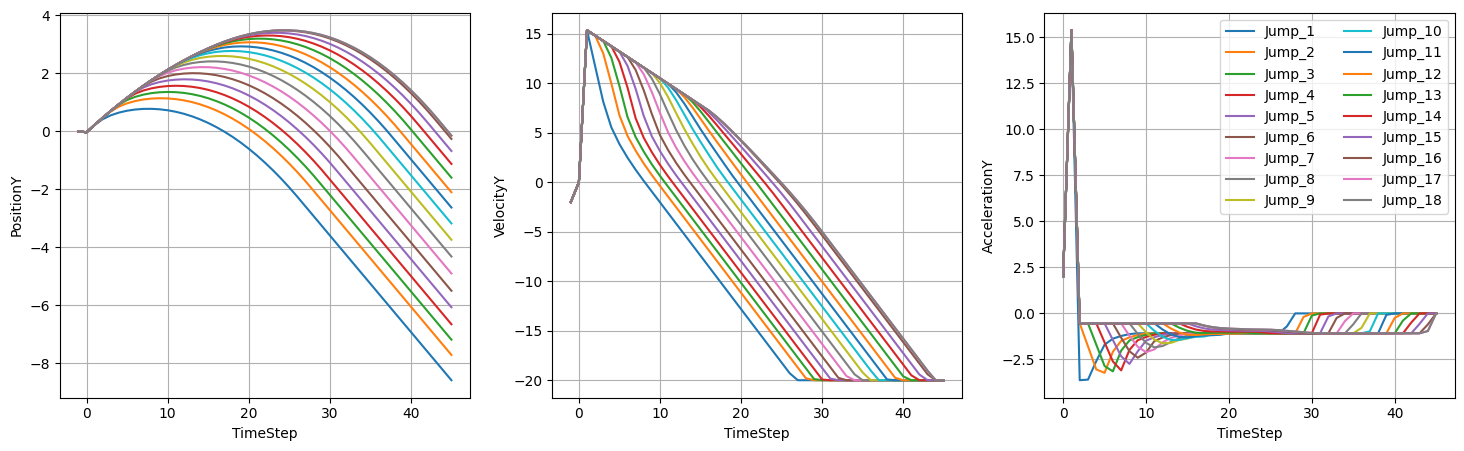

In [28]:
results = TestResults.load('VerticalWallJumpTests')

if not results.hasData() or forceTests:
    
    results.Data = TestRunner.runTests([
        TestScenario(levelName='WallJumpTests', testSteps=[
            TestStep(actions=['Right'], repeatCounts=[30]),
            TestStep(actions=['Left', 'Sprint', 'Up'], repeatCounts=[60]),
            TestStep(actions=['Jump'], repeatCounts=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]),
            TestStep(actions=[], repeatCounts=[60])
        ])    
    ])

    results.filter(lambda d: d[d['TimeStep'] >= 89])
    results.filter(lambda d: d[d['TimeStep'] < 47])
    results.Data['TimeStep'] -= 1
    results.updateColumn(lambda d: d['TimeStep'] == 0, 'VelocityY', 0)   

    for test in results.getTestCases():
        results.renameTestCase(test, 'Jump_'+str(int(test.split('_')[2][-4:-1])))

    results.save()


testResultSets[results.Name] = results.getTestCases()
results.addAccelerations()
results.plotTests([ 
    ('TimeStep', 'PositionY'),
    ('TimeStep', 'VelocityY'),
    ('TimeStep', 'AccelerationY'),
], showLegend=True, plotTitle=False, plotTargetLines=False,
   saveLocation=f'{dataAnalysisRoot}/TestResultPlots/{results.Name}.png')

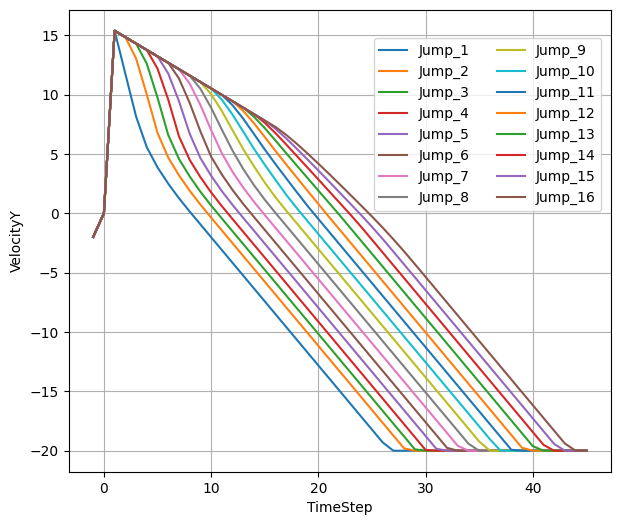

In [30]:
results.filterScenario(['Jump_1', 'Jump_2', 'Jump_3', 'Jump_4', 'Jump_5', 'Jump_6', 'Jump_7', 'Jump_8', 'Jump_9', 'Jump_10', 'Jump_11', 'Jump_12', 'Jump_13', 'Jump_14', 'Jump_15', 'Jump_16'])
results.Data['TimeStep'] -= 1
results.plotTests([
    ('TimeStep', 'VelocityY')
], showLegend=True, plotTitle=False, plotTargetLines=False, plotSize=(7,6),
   legenPosition=(0.55, 0.55),
   saveLocation=f'{dataAnalysisRoot}/TestResultPlots/VerticalWallJumpBehavior.png')

In [18]:
# data = results.Data[results.Data['ScenarioName'] == 'Jump_18']
# data = data[['VelocityY']]
# data['AccelerationY'] = data['VelocityY'].diff()
# data


# Vertical Wall Slide Tests

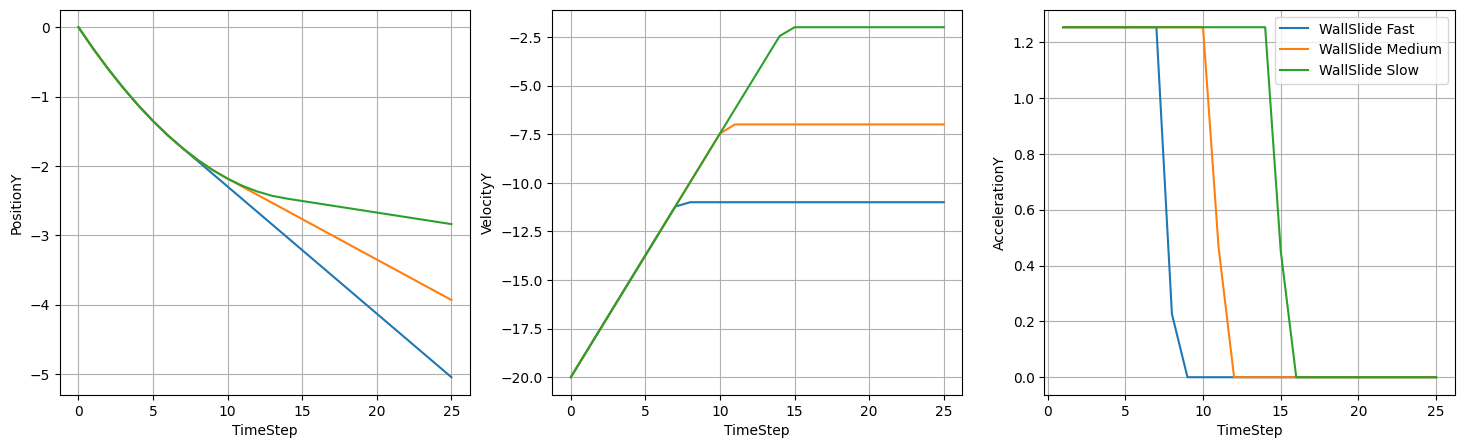

In [19]:
results = TestResults.load('VerticalWallSlideTests')


if not results.hasData() or forceTests:
    results.Data = TestRunner.runTests([
        TestScenario(levelName='WallJumpTests', testSteps=[
            TestStep(actions=['Right'], repeatCounts=[30]),
            TestStep(actions=['Left', 'Sprint', 'Down'], repeatCounts=[60]),
            TestStep(actions=[], repeatCounts=[10])
        ]),
        TestScenario(levelName='WallJumpTests', testSteps=[
            TestStep(actions=['Right'], repeatCounts=[30]),
            TestStep(actions=['Left', 'Sprint'], repeatCounts=[60]),
            TestStep(actions=[], repeatCounts=[10])
        ]),
        TestScenario(levelName='WallJumpTests', testSteps=[
            TestStep(actions=['Right'], repeatCounts=[30]),
            TestStep(actions=['Left', 'Sprint', 'Up'], repeatCounts=[60]),
            TestStep(actions=[], repeatCounts=[10])
        ]),
        TestScenario(levelName='WallJumpTests', testSteps=[
            TestStep(actions=[], repeatCounts=[30]),
            TestStep(actions=[], repeatCounts=[25]),
            TestStep(actions=['Jump', 'Left', 'Sprint', 'Down'], repeatCounts=[60], positionOffset={'x': 2.5, 'y': -10}),
            TestStep(actions=[], repeatCounts=[10])
        ]),
        TestScenario(levelName='WallJumpTests', testSteps=[
            TestStep(actions=[], repeatCounts=[30]),
            TestStep(actions=[], repeatCounts=[25]),
            TestStep(actions=['Jump', 'Left', 'Sprint'], repeatCounts=[60], positionOffset={'x': 2.5, 'y': -10}),
            TestStep(actions=[], repeatCounts=[10])
        ]),
        TestScenario(levelName='WallJumpTests', testSteps=[
            TestStep(actions=[], repeatCounts=[30]),
            TestStep(actions=[], repeatCounts=[25]),
            TestStep(actions=['Jump', 'Left', 'Sprint', 'Up'], repeatCounts=[60], positionOffset={'x': 2.5, 'y': -10}),
            TestStep(actions=[], repeatCounts=[10])
        ])
    ])
    
    results.filter(lambda d: d[d['TimeStep'] >= 55])
    results.filter(lambda d: d[d['TimeStep'] <= 50])

    results.renameTestCase('[Right](030)_[Left,Sprint,Down](060)_[](010)', 'WallSlide Fast')
    results.renameTestCase('[Right](030)_[Left,Sprint](060)_[](010)', 'WallSlide Medium')
    results.renameTestCase('[Right](030)_[Left,Sprint,Up](060)_[](010)', 'WallSlide Slow')
    results.renameTestCase('[](030)_[](025)_[Jump,Left,Sprint,Down](060)_[](010)', 'JumpToFast')
    results.renameTestCase('[](030)_[](025)_[Jump,Left,Sprint](060)_[](010)', 'JumpToMedium')
    results.renameTestCase('[](030)_[](025)_[Jump,Left,Sprint,Up](060)_[](010)', 'JumpToSlow')

    results.save()

results.filterScenario(scenarioName=['WallSlide Fast', 'WallSlide Medium', 'WallSlide Slow'])
results.filter(lambda d: d[d['TimeStep'] <= 25])

testResultSets[results.Name] = results.getTestCases()
results.addAccelerations()
results.plotTests([ 
    ('TimeStep', 'PositionY'),
    ('TimeStep', 'VelocityY'),
    ('TimeStep', 'AccelerationY')
], plotTitle=False, plotTargetLines=False,
saveLocation=f'{dataAnalysisRoot}/TestResultPlots/{results.Name}.png')

In [20]:
# from models.actions.HorizontalActionSeries import HorizontalActionSeries
# from models.actions.MotionState import MotionState
# from models.actions.VerticalActionSeries import VerticalActionSeries


# data = VerticalActionSeries('VerticalWallSlideTests', 'WallSlide Fast', 0, 50, MotionState.OnWall, resetVelocityInFirstFrame=False).Data

# print(-5.53747 + 1.25333)
# data['AccelerationY'] = data['VelocityY'].diff()
# data


# Coyote Jump Tests

['[](005)_[Right,Sprint](055)_[Right,Sprint](015)_[Jump,Right,Sprint](030)_[](005)', '[](005)_[Right,Sprint](055)_[Right,Sprint](016)_[Jump,Right,Sprint](030)_[](005)', '[](005)_[Right,Sprint](055)_[Right,Sprint](017)_[Jump,Right,Sprint](030)_[](005)', '[](005)_[Right,Sprint](055)_[Right,Sprint](018)_[Jump,Right,Sprint](030)_[](005)', '[](005)_[Right,Sprint](055)_[Right,Sprint](019)_[Jump,Right,Sprint](030)_[](005)', '[](005)_[Right,Sprint](055)_[Right,Sprint](020)_[Jump,Right,Sprint](030)_[](005)', '[](005)_[Right,Sprint](055)_[Right,Sprint](021)_[Jump,Right,Sprint](030)_[](005)', '[](005)_[Right,Sprint](055)_[Right,Sprint](022)_[Jump,Right,Sprint](030)_[](005)', '[](005)_[Right,Sprint](055)_[Right,Sprint](023)_[Jump,Right,Sprint](030)_[](005)', '[](005)_[Right,Sprint](055)_[Right,Sprint](024)_[Jump,Right,Sprint](030)_[](005)', '[](005)_[Right,Sprint](055)_[Right,Sprint](025)_[Jump,Right,Sprint](030)_[](005)', '[](005)_[Right,Sprint](055)_[Right,Sprint](026)_[Jump,Right,Sprint](030)_[

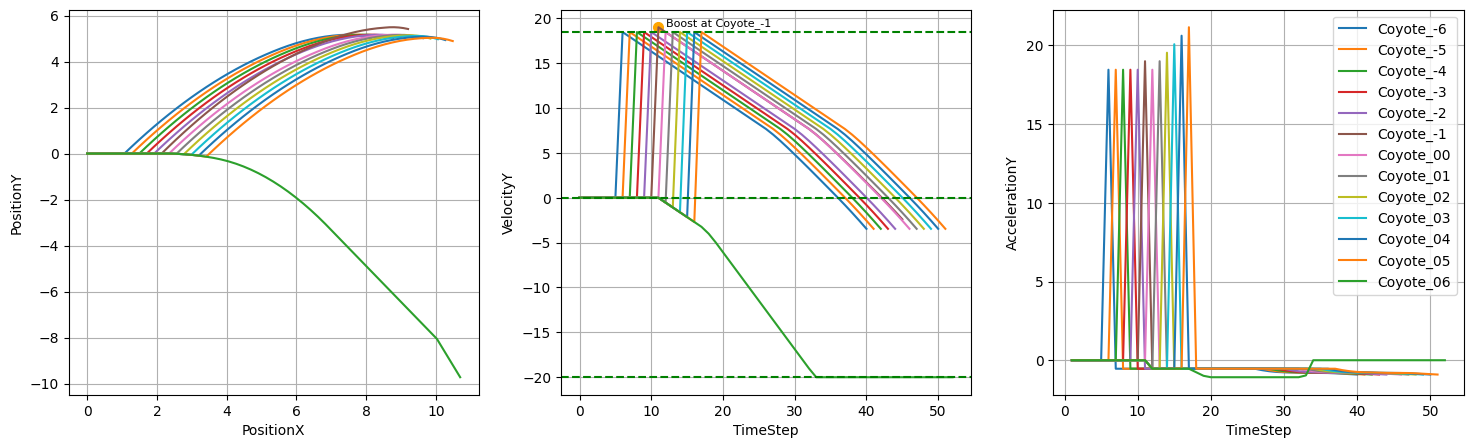

In [4]:
from matplotlib import axes


results = TestResults.load('CoyoteJumpTests')


if not results.hasData() or False:
    results.Data = TestRunner.runTests([
        TestScenario(levelName='WalkTests', testSteps=[
            TestStep(actions=[], repeatCounts=[5]),
            TestStep(actions=['Right', 'Sprint'], repeatCounts=[55]),
            TestStep(actions=['Right', 'Sprint'], repeatCounts=[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
            TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[30]),
            TestStep(actions=[], repeatCounts=[5])
        ])
    ])
    
    results.save()


results.filter(lambda d: d[d['TimeStep'] >= 70], reset_time_steps=True)
results.moveStartTime(4)
results.filter(lambda d: d[d['TimeStep'] < 50])

print(results.getTestCases())
results.renameTestCase('[](005)_[Right,Sprint](055)_[Right,Sprint](015)_[Jump,Right,Sprint](030)_[](005)', 'Coyote_-6')
results.renameTestCase('[](005)_[Right,Sprint](055)_[Right,Sprint](016)_[Jump,Right,Sprint](030)_[](005)', 'Coyote_-5')
results.renameTestCase('[](005)_[Right,Sprint](055)_[Right,Sprint](017)_[Jump,Right,Sprint](030)_[](005)', 'Coyote_-4')
results.renameTestCase('[](005)_[Right,Sprint](055)_[Right,Sprint](018)_[Jump,Right,Sprint](030)_[](005)', 'Coyote_-3')
results.renameTestCase('[](005)_[Right,Sprint](055)_[Right,Sprint](019)_[Jump,Right,Sprint](030)_[](005)', 'Coyote_-2')
results.renameTestCase('[](005)_[Right,Sprint](055)_[Right,Sprint](020)_[Jump,Right,Sprint](030)_[](005)', 'Coyote_-1')
results.renameTestCase('[](005)_[Right,Sprint](055)_[Right,Sprint](021)_[Jump,Right,Sprint](030)_[](005)', 'Coyote_00')
results.renameTestCase('[](005)_[Right,Sprint](055)_[Right,Sprint](022)_[Jump,Right,Sprint](030)_[](005)', 'Coyote_01')
results.renameTestCase('[](005)_[Right,Sprint](055)_[Right,Sprint](023)_[Jump,Right,Sprint](030)_[](005)', 'Coyote_02')
results.renameTestCase('[](005)_[Right,Sprint](055)_[Right,Sprint](024)_[Jump,Right,Sprint](030)_[](005)', 'Coyote_03')
results.renameTestCase('[](005)_[Right,Sprint](055)_[Right,Sprint](025)_[Jump,Right,Sprint](030)_[](005)', 'Coyote_04')
results.renameTestCase('[](005)_[Right,Sprint](055)_[Right,Sprint](026)_[Jump,Right,Sprint](030)_[](005)', 'Coyote_05')
results.renameTestCase('[](005)_[Right,Sprint](055)_[Right,Sprint](027)_[Jump,Right,Sprint](030)_[](005)', 'Coyote_06')
testResultSets[results.Name] = results.getTestCases()
results.addAccelerations()

def plotOutlier(ax:list[axes.Axes]):
    name = results.Data.loc[np.argmax(results.Data['VelocityY'].values), 'ScenarioName']
    x = results.Data.loc[np.argmax(results.Data['VelocityY'].values), 'TimeStep']
    y = np.max(results.Data['VelocityY'].values)
    ax[1].plot(x, y, 'o', color='orange', markersize=7, zorder=-1)
    ax[1].text(x+1, y+0.2, f'Boost at {name}', color='black', fontsize=8, zorder=10)
    ax[2].legend()

results.plotTests([ 
    ('PositionX', 'PositionY'),
    ('TimeStep', 'VelocityY'),
    ('TimeStep', 'AccelerationY'),
], showLegend=False, plotTitle=False,
   saveLocation=f'{dataAnalysisRoot}/TestResultPlots/{results.Name}.png',
   plotCallback=plotOutlier 
)

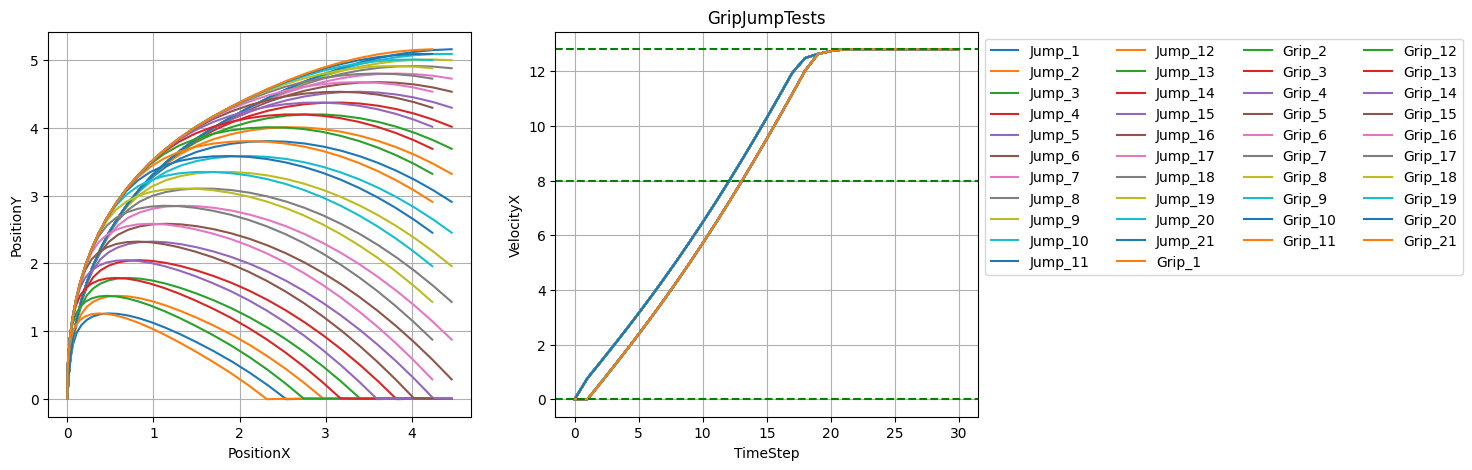

In [22]:
results = TestResults.load('GripJumpTests')


if not results.hasData() or forceTests:
    results.Data = TestRunner.runTests([
        TestScenario(levelName='WalkTests', testSteps=[
            TestStep(actions=['Down'], repeatCounts=[5]),
            TestStep(actions=[], repeatCounts=[5]),
            TestStep(actions=['Right', 'Sprint', 'Jump'], repeatCounts=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]),
            TestStep(actions=['Right', 'Sprint'], repeatCounts=[60])
        ]),
        TestScenario(levelName='WalkTests', testSteps=[
            TestStep(actions=['Down'], repeatCounts=[5]),
            TestStep(actions=['Down'], repeatCounts=[5]),
            TestStep(actions=['Down', 'Right', 'Sprint', 'Jump'], repeatCounts=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]),
            TestStep(actions=['Right', 'Sprint'], repeatCounts=[60])
        ])  
    ])
    
    results.save()


results.filterTime(10, 30)

for test in results.getTestCases():
    if test.split('_')[1] == '[Down](005)':
        results.renameTestCase(test, 'Grip_'+str(int(test.split('_')[2][-4:-1])))
    else:
        results.renameTestCase(test, 'Jump_'+str(int(test.split('_')[2][-4:-1])))

# testResultSets[results.Name] = results.getTestCases()
results.plotTests([ 
    ('PositionX', 'PositionY'),
    ('TimeStep', 'VelocityX'),
])

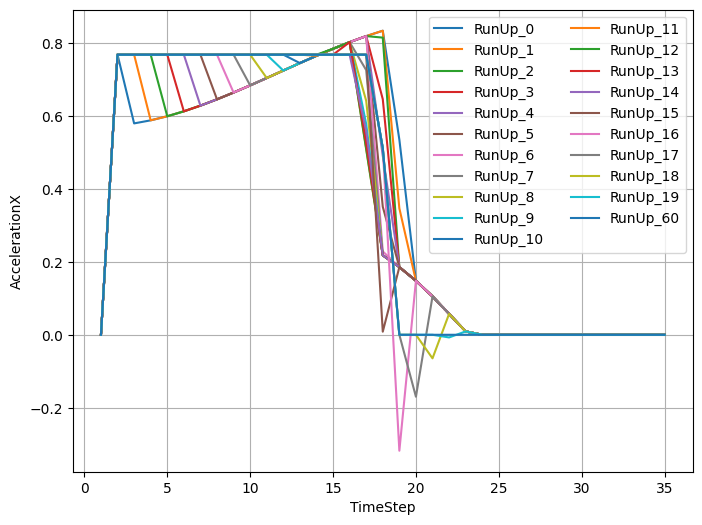

In [23]:
results = TestResults.load('RunUpJumpTests')


if not results.hasData() or forceTests:
    results.Data = TestRunner.runTests([
        TestScenario(levelName='WalkTests', testSteps=[
            TestStep(actions=['Down'], repeatCounts=[5]),
            TestStep(actions=[], repeatCounts=[5]),
            TestStep(actions=['Right', 'Sprint'], repeatCounts=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 60]),
            TestStep(actions=['Jump', 'Right', 'Sprint'], repeatCounts=[60])
        ])
    ])
    
    results.save()


results.filterTime(9, 35)

for test in results.getTestCases():
    results.renameTestCase(test, 'RunUp_'+str(int(test.split('_')[2][-4:-1])))

# results.filterScenario('RunUp_17')

# testResultSets[results.Name] = results.getTestCases()
results.addAccelerations()
results.plotTests([
        ('TimeStep', 'AccelerationX'),
    ], plotSize=(8,6),
    plotTitle=False,
    saveLocation=f'{dataAnalysisRoot}/TestResultPlots/{results.Name}.png'
)

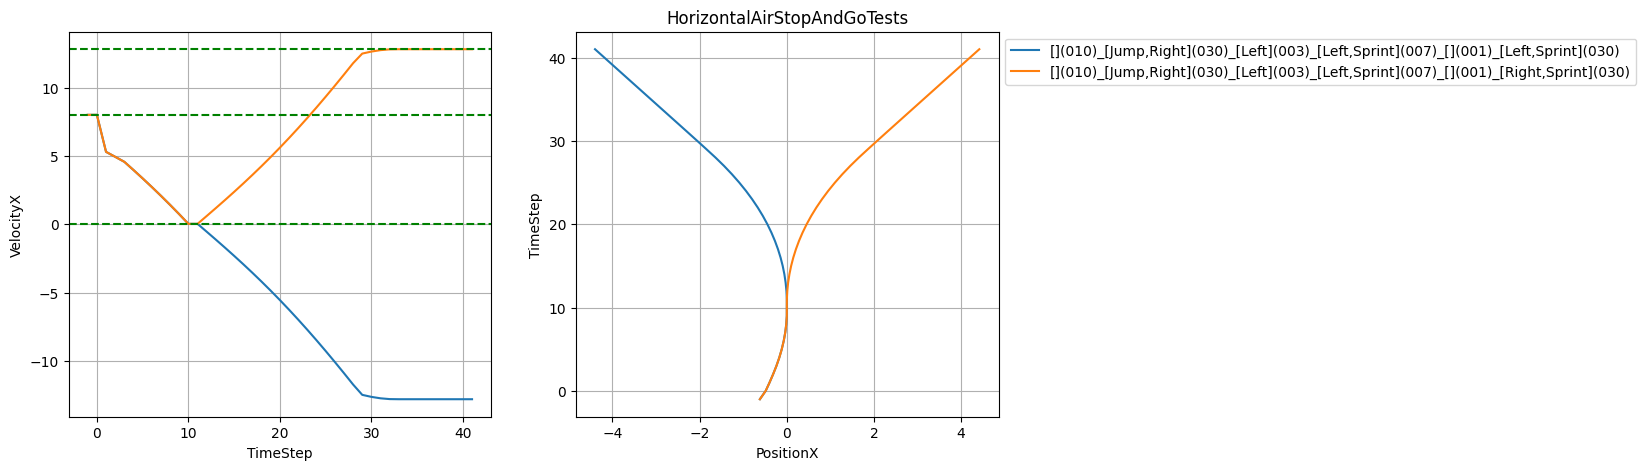

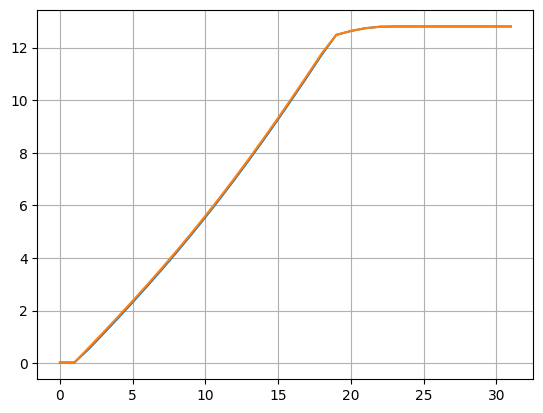

In [24]:
results = TestResults.load('HorizontalAirStopAndGoTests')

if not results.hasData() or forceTests:
    
    results.Data = TestRunner.runTests([
        TestScenario(levelName='WallJumpTests', testSteps=[
            TestStep(actions=[], repeatCounts=[10]),
            TestStep(actions=['Jump', 'Right'], repeatCounts=[30], positionOffset={ 'x' : 10, 'y' : 0 }),

            TestStep(actions=['Left'], repeatCounts=[3]),
            TestStep(actions=['Left', 'Sprint'], repeatCounts=[7]),
            TestStep(actions=[], repeatCounts=[1]),
            TestStep(actions=['Left', 'Sprint'], repeatCounts=[30])
        ]),
        TestScenario(levelName='WallJumpTests', testSteps=[
            TestStep(actions=[], repeatCounts=[10]),
            TestStep(actions=['Jump', 'Right'], repeatCounts=[30], positionOffset={ 'x' : 10, 'y' : 0 }),

            TestStep(actions=['Left'], repeatCounts=[3]),
            TestStep(actions=['Left', 'Sprint'], repeatCounts=[7]),
            TestStep(actions=[], repeatCounts=[1]),
            TestStep(actions=['Right', 'Sprint'], repeatCounts=[30])
        ]),
    ])

    results.filter(lambda d: d[d['TimeStep'] >= 39])
    # results.filter(lambda d: d[d['TimeStep'] <= 12])

    tests = results.getTestCases()

    def get_abs_velocity_x(testName):
        return results.Data[(results.Data['TimeStep'] == 12) & (results.Data['ScenarioName'] == testName)]['VelocityX'].abs().values[0]

    sorted_tests = sorted(tests, key=get_abs_velocity_x)
    results.Data = results.Data[results.Data['ScenarioName'].isin(sorted_tests[:2])]
    results.Data['TimeStep'] -= 1

    results.renameTestCase('[](010)_[Jump,Right](030)_[Left](003)_[Left,Sprint](007)_[Left](000)_[](060)', 'Walk -> Idle')
    print(results.getTestCases())

    results.save()


# results.filter(lambda d: d[d['TimeStep'] >= 0])
# results.filter(lambda d: d[d['TimeStep'] <= 10])

results.Data['PositionX'] -= results.Data.loc[10, 'PositionX']


testResultSets[results.Name] = results.getTestCases()
results.plotTests([
    ('TimeStep', 'VelocityX'),
    ('PositionX', 'TimeStep'),
])
plt.show()



a = results.clone()
a.filterScenario('[](010)_[Jump,Right](030)_[Left](003)_[Left,Sprint](007)_[](001)_[Left,Sprint](030)').filterTime(11,99).selectColumns(['TimeStep', 'VelocityX'])
b = results.clone()
b.filterScenario('[](010)_[Jump,Right](030)_[Left](003)_[Left,Sprint](007)_[](001)_[Right,Sprint](030)').filterTime(11,99).selectColumns(['TimeStep', 'VelocityX'])

x = a.Data.join(b.Data, lsuffix='_Left', rsuffix='_Right')

x['VelocityX_Left2'] = x['VelocityX_Left'].abs()
x['diff'] = (x['VelocityX_Left'].abs() - x['VelocityX_Right'].abs()) / 2

plt.plot(x['TimeStep_Left'], x['VelocityX_Left2'])
plt.plot(x['TimeStep_Left'], x['VelocityX_Right'])
plt.grid()
# x

# x

# Super Jump Tests

,TimeStep,Actions,PositionX,PositionY,VelocityX,VelocityY,OnGround,OnWall,CanJump,Jumping,LookingUp,CrouchingDown,LeftColliding,RightColliding,HeadColliding,FeetColliding
ScenarioName,,,,,,,,,,,,,,,,
Normal Jump,87,"[Jump, Sprint, Right]",1.681,6.59226,12.24062,15.37265,False,True,True,True,False,False,False,True,False,False
Super Jump,86,"[Jump, Sprint, Right]",1.681,7.49632,12.24062,17.17360,False,True,True,True,False,False,False,True,False,False


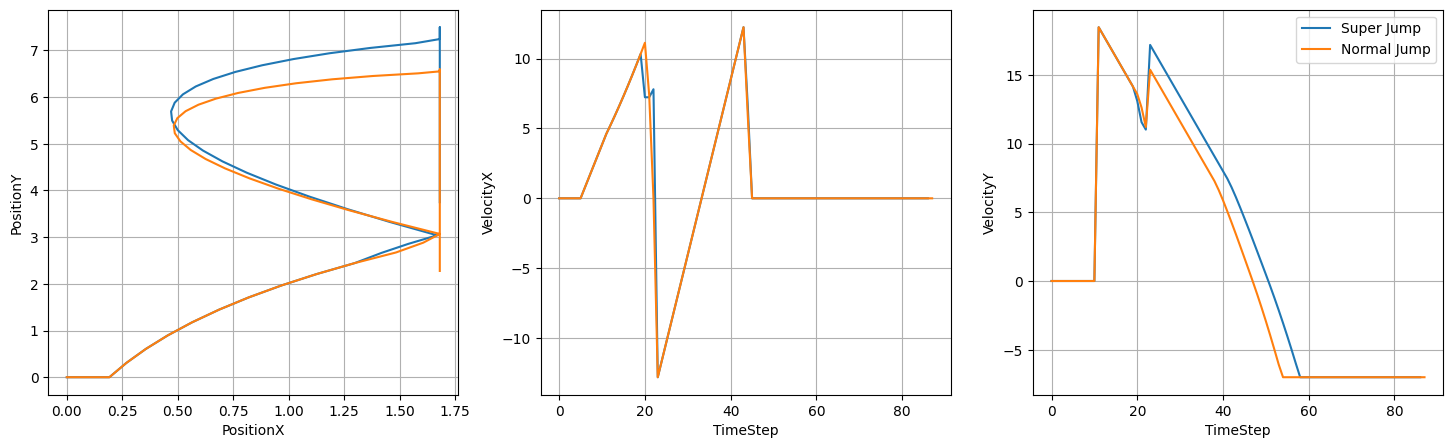

In [25]:
results = TestResults.load('SuperJumpTests')

if not results.hasData() or False:
    
    results.Data = TestRunner.runTests([
        # TestScenario(levelName='TallClimb', testSteps=[
        #     TestStep(actions=[], repeatCounts=[10]),
        #     TestStep(actions=['Sprint', 'Right'], repeatCounts=[66]),
        #     TestStep(actions=['Jump', 'Sprint', 'Right'], repeatCounts=[9, 10, 11, 12, 13, 14]),
        #     TestStep(actions=[], repeatCounts=[1,2]),
        #     TestStep(actions=['Jump', 'Sprint', 'Right'], repeatCounts=[60]),
        #     TestStep(actions=[], repeatCounts=[5])
        # ]),
        TestScenario(levelName='TallClimb', testSteps=[
            TestStep(actions=[], repeatCounts=[10], positionOffset={'x': 14}),
            TestStep(actions=['Sprint', 'Right'], repeatCounts=[5]),
            TestStep(actions=['Jump', 'Sprint', 'Right'], repeatCounts=[9,10]),
            TestStep(actions=[], repeatCounts=[2]),
            TestStep(actions=['Jump', 'Sprint', 'Right'], repeatCounts=[60]),
            TestStep(actions=[], repeatCounts=[5])
        ]),
    ])

    print(results.getTestCases())

    # results.filter(lambda d: d[d['TimeStep'] >= 39])
    # results.filter(lambda d: d[d['TimeStep'] <= 31])
    # results.Data['TimeStep'] -= 1
    
    results.save()

results.filter(lambda d: d[d['TimeStep'] >= 5])

results.renameTestCase('[](010)_[Sprint,Right](005)_[Jump,Sprint,Right](009)_[](002)_[Jump,Sprint,Right](060)_[](005)', 'Super Jump')
results.renameTestCase('[](010)_[Sprint,Right](005)_[Jump,Sprint,Right](010)_[](002)_[Jump,Sprint,Right](060)_[](005)', 'Normal Jump')


testResultSets[results.Name] = results.getTestCases()
results.plotTests([ 
        ('PositionX', 'PositionY'),
        ('TimeStep', 'VelocityX'),
        ('TimeStep', 'VelocityY'),
    ], showLegend=True, plotTitle=False, plotTargetLines=False,
    saveLocation=f'{dataAnalysisRoot}/TestResultPlots/{results.Name}.png'
)

d = results.Data
d = d[d.TimeStep > 20]
d.groupby('ScenarioName').max()

In [26]:
d = results.Data
d[d.TimeStep > 25].VelocityY.groupby(d.ScenarioName).max()

ScenarioName
Normal Jump    13.75265
Super Jump     15.55360
Name: VelocityY, dtype: float64

# Small Block Boost Tests

,TimeStep,Actions,PositionX,PositionY,VelocityX,VelocityY,OnGround,OnWall,CanJump,Jumping,LookingUp,CrouchingDown,LeftColliding,RightColliding,HeadColliding,FeetColliding
ScenarioName,,,,,,,,,,,,,,,,
Normal Jump,70,"[Sprint, Right]",3.69604,1.25955,12.80000,18.46,True,False,True,True,False,False,False,True,False,True
Small Block Boost,70,"[Sprint, Right]",7.76776,1.64915,12.80195,18.46,True,True,True,True,False,False,False,True,False,True


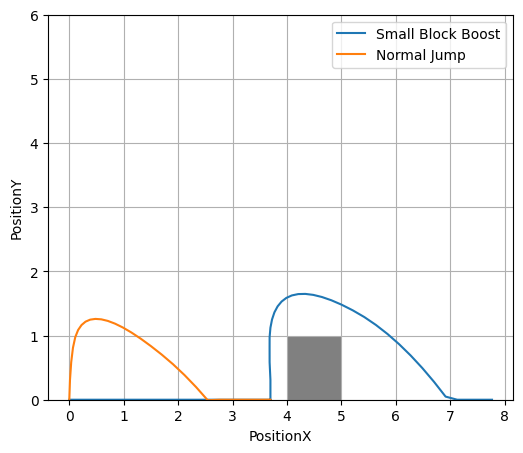

In [27]:
results = TestResults.load('SmallBlockJumpOverBoostTests')

if not results.hasData() or False:
    
    results.Data = TestRunner.runTests([
        TestScenario(levelName='OneBlockBoostTest', testSteps=[
            TestStep(actions=[], repeatCounts=[10]),
            TestStep(actions=['Sprint', 'Right'], repeatCounts=[30]),
            TestStep(actions=['Jump', 'Sprint', 'Right'], repeatCounts=[1]),
            TestStep(actions=['Sprint', 'Right'], repeatCounts=[60]),
            TestStep(actions=[], repeatCounts=[5])
        ]),
        TestScenario(levelName='OneBlockBoostTest', testSteps=[
            TestStep(actions=[], repeatCounts=[40]),
            TestStep(actions=['Jump', 'Sprint', 'Right'], repeatCounts=[1]),
            TestStep(actions=['Sprint', 'Right'], repeatCounts=[60]),
            TestStep(actions=[], repeatCounts=[5])
        ]),
    ])

    print(results.getTestCases())

    # results.filter(lambda d: d[d['TimeStep'] >= 39])
    # results.filter(lambda d: d[d['TimeStep'] <= 31])
    # results.Data['TimeStep'] -= 1
    
    results.save()

results.filter(lambda d: d[(d.TimeStep >= 0) & (d.TimeStep <= 70)])

results.renameTestCase('[](010)_[Sprint,Right](030)_[Jump,Sprint,Right](001)_[Sprint,Right](060)_[](005)', 'Small Block Boost')
results.renameTestCase('[](040)_[Jump,Sprint,Right](001)_[Sprint,Right](060)_[](005)', 'Normal Jump')

def plotBlock(ax:list[axis.Axis]):
    x1, y1 = 4, 0
    x = np.array([x1, x1+1, x1+1, x1, x1])
    y = np.array([y1, y1, y1+1, y1+1, y1])
    ax.fill(x, y, 'gray', alpha=1, fill=True, linewidth=1, edgecolor=None, zorder=-1)
    ax.set_ylim([0, 6])
    pass

testResultSets[results.Name] = results.getTestCases()
results.plotTests([ 
        ('PositionX', 'PositionY'),
    ], showLegend=True, plotTitle=False, plotTargetLines=False,
    saveLocation=f'{dataAnalysisRoot}/TestResultPlots/{results.Name}.png',
    plotCallback=plotBlock    
)

d = results.Data
d = d[d.TimeStep > 20]
d.groupby('ScenarioName').max()